## PROYECTO: MedCamp 

# 1. Carga de datos

In [1]:
import numpy as np

In [2]:
import pandas as pd
xls = pd.ExcelFile("ML_Agrupado.xlsx")

In [3]:
Train = xls.parse("Train") #Train

In [4]:
Formato1 = Train.loc[Train["Category1"]=="First"]
Formato2 = Train.loc[Train["Category1"]=="Second"]
Formato3 = Train.loc[Train["Category1"]=="Third"]

In [5]:
Test = xls.parse("Test") #Test

In [6]:
Train.head(2).T

,0,1
Patient_ID,513297,498948
Health_Camp_ID,6570,6527
Registration_Date,2005-06-29 00:00:00,2005-07-05 00:00:00
Var1,0,0
Var2,0,0
Var3,0,0
Var4,0,0
Var5,0,0
Category1,First,Third
Category2,E,G


## Revisión inicial

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58532 entries, 0 to 58531
Data columns (total 33 columns):
Patient_ID                   58532 non-null int64
Health_Camp_ID               58532 non-null int64
Registration_Date            58209 non-null datetime64[ns]
Var1                         58532 non-null int64
Var2                         58532 non-null int64
Var3                         58532 non-null int64
Var4                         58532 non-null int64
Var5                         58532 non-null int64
Category1                    58532 non-null object
Category2                    58532 non-null object
Category3                    58532 non-null int64
Camp_Start_Date              58532 non-null datetime64[ns]
Camp_End_Date                58532 non-null datetime64[ns]
Donation_F1                  5491 non-null float64
Health_Score_F1              5491 non-null float64
Health_Score_F2              3629 non-null float64
Health_Score_T               0 non-null float64
Number_of_s

In [8]:
var_num = ['Var1',
'Var2',
'Var3',
'Var4',
'Var5',
#'Donation_F1',
#'Health_Score_F1',
#'Health_Score_F2',
#'Health_Score_T',
#'Number_of_stall_visited',
#'Last_Stall_Visited_Number',
#'Income',
'Education_Score',
'Age']

In [9]:
vars_obj = list(Train.select_dtypes(include = ['object']).columns.values)
#vars_obj.remove('ID')
vars_obj.append("Category3") 
vars_obj.append("Online_Follower") 
vars_obj.append("LinkedIn_Shared") 
vars_obj.append("Twitter_Shared") 
vars_obj.append("Facebook_Shared") 
vars_obj.append("Income") 
#vars_obj.append("Education_Score") 
print(vars_obj)

['Category1', 'Category2', 'City_Type', 'Employer_Category', 'Category3', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared', 'Facebook_Shared', 'Income']


In [10]:
for elements in vars_obj:
    print( str(elements) + " ----> " +
        str(Train[elements].unique()))

Category1 ----> ['First' 'Third' 'Second']
Category2 ----> ['E' 'G' 'F' 'A' 'C' 'B' 'D']
City_Type ----> ['E' 'I' nan 'G' 'F' 'D' 'A' 'H' 'B' 'C']
Employer_Category ----> ['Technology' 'Retail' nan 'Others' 'Consulting' 'Health'
 'Software Industry' 'Manufacturing' 'Broadcasting' 'Telecom' 'BFSI'
 'Food' 'Transport' 'Education' 'Real Estate']
Category3 ----> [2 1]
Online_Follower ----> [0 1]
LinkedIn_Shared ----> [0 1]
Twitter_Shared ----> [0 1]
Facebook_Shared ----> [0 1]
Income ----> [ 3.  1. nan  0.  4.  2.  5.  6.]


In [11]:
for elements in vars_obj:
    print("****************************************************************");
    Cuentas=pd.DataFrame(Train[elements].value_counts(dropna=False))
    Porc_Vert=pd.DataFrame(Train[elements].value_counts(normalize=True,dropna=False))
    Cant_Target=pd.DataFrame(Train.groupby(by=[elements], as_index=True)['Flag_Total'].sum())
    Porc_Target=pd.DataFrame(Train.groupby(by=[elements], as_index=True)['Flag_Total'].mean())
    print(pd.concat([Cuentas,Cant_Target,Porc_Vert,Porc_Target],axis=1))
    

****************************************************************
           Category1  Flag_Total  Category1  Flag_Total
Category1                                              
First          43857        5491   0.749282    0.125202
Second          7694        3629   0.131449    0.471666
Third           6981        4325   0.119268    0.619539
****************************************************************
   Category2  Flag_Total  Category2  Flag_Total
A       3573        1249   0.061044    0.349566
B       2426         387   0.041447    0.159522
C       1728         604   0.029522    0.349537
D       4121        2380   0.070406    0.577530
E      18902        1980   0.322934    0.104751
F      20801        2520   0.355378    0.121148
G       6981        4325   0.119268    0.619539
****************************************************************
     City_Type  Flag_Total  City_Type  Flag_Total
NaN      26427         NaN   0.451497         NaN
B         6455      1681.0   0.110282    

In [12]:
for elements in vars_obj:
    print("****************************************************************");
    Cuentas=pd.DataFrame(Formato1[elements].value_counts(dropna=False))
    Porc_Vert=pd.DataFrame(Formato1[elements].value_counts(normalize=True,dropna=False))
    Porc_Target=pd.DataFrame(Formato1.groupby(by=[elements], as_index=True)['Flag_Total'].mean())
    print(pd.concat([Cuentas,Porc_Vert,Porc_Target],axis=1))
    

****************************************************************
           Category1  Category1  Flag_Total
Category1                                  
First          43857        1.0    0.125202
****************************************************************
   Category2  Category2  Flag_Total
B       2426   0.055316    0.159522
C       1728   0.039401    0.349537
E      18902   0.430992    0.104751
F      20801   0.474291    0.121148
****************************************************************
     City_Type  City_Type  Flag_Total
NaN      20204   0.460679         NaN
B         4725   0.107737    0.147513
H         3471   0.079144    0.180640
D         3187   0.072668    0.173517
G         2481   0.056570    0.172108
C         2404   0.054815    0.186772
E         2235   0.050961    0.166443
I         1840   0.041955    0.163587
A         1745   0.039788    0.144413
F         1565   0.035684    0.170607
****************************************************************
          

In [13]:
for elements in vars_obj:
    print("****************************************************************");
    Cuentas=pd.DataFrame(Formato2[elements].value_counts(dropna=False))
    Porc_Vert=pd.DataFrame(Formato2[elements].value_counts(normalize=True,dropna=False))
    Porc_Target=pd.DataFrame(Formato2.groupby(by=[elements], as_index=True)['Flag_Total'].mean())
    print(pd.concat([Cuentas,Porc_Vert,Porc_Target],axis=1))

****************************************************************
           Category1  Category1  Flag_Total
Category1                                  
Second          7694        1.0    0.471666
****************************************************************
   Category2  Category2  Flag_Total
A       3573   0.464388    0.349566
D       4121   0.535612    0.577530
****************************************************************
     City_Type  City_Type  Flag_Total
NaN       3155   0.410060         NaN
B          941   0.122303    0.476089
D          578   0.075123    0.487889
H          538   0.069925    0.533457
G          511   0.066415    0.483366
C          479   0.062256    0.509395
E          453   0.058877    0.472406
I          388   0.050429    0.497423
F          343   0.044580    0.542274
A          308   0.040031    0.490260
****************************************************************
                   Employer_Category  Employer_Category  Flag_Total
NaN           

In [14]:
for elements in vars_obj:
    print("****************************************************************");
    Cuentas=pd.DataFrame(Formato3[elements].value_counts(dropna=False))
    Porc_Vert=pd.DataFrame(Formato3[elements].value_counts(normalize=True,dropna=False))
    Porc_Target=pd.DataFrame(Formato3.groupby(by=[elements], as_index=True)['Flag_Total'].mean())
    print(pd.concat([Cuentas,Porc_Vert,Porc_Target],axis=1))

****************************************************************
           Category1  Category1  Flag_Total
Category1                                  
Third           6981        1.0    0.619539
****************************************************************
           Category2  Category2  Flag_Total
Category2                                  
G               6981        1.0    0.619539
****************************************************************
     City_Type  City_Type  Flag_Total
NaN       3068   0.439479         NaN
B          789   0.113021    0.679341
D          491   0.070334    0.647658
H          457   0.065463    0.715536
G          438   0.062742    0.703196
C          425   0.060880    0.663529
E          367   0.052571    0.719346
I          344   0.049277    0.694767
A          327   0.046841    0.752294
F          275   0.039393    0.694545
****************************************************************
                   Employer_Category  Employer_Category  F

In [15]:
Train1 = Train.copy()

In [16]:
#Train1["Dias_Transcurridos"].head()
Train1["Registration_Date"].fillna(Train1["Camp_Start_Date"], inplace = True)

In [17]:
Train1["Dias_Campamento"] = Train1["Camp_End_Date"] - Train1["Camp_Start_Date"] 

In [18]:
Train1["Dias_Transcurridos"] = Train1["Registration_Date"] - Train1["Camp_Start_Date"] 

In [19]:
Train1.isnull().sum()/58532 

Patient_ID                   0.000000
Health_Camp_ID               0.000000
Registration_Date            0.000000
Var1                         0.000000
Var2                         0.000000
Var3                         0.000000
Var4                         0.000000
Var5                         0.000000
Category1                    0.000000
Category2                    0.000000
Category3                    0.000000
Camp_Start_Date              0.000000
Camp_End_Date                0.000000
Donation_F1                  0.906188
Health_Score_F1              0.906188
Health_Score_F2              0.938000
Health_Score_T               1.000000
Number_of_stall_visited      0.925801
Last_Stall_Visited_Number    0.925801
Flag_Form1                   0.000000
Flag_Form2                   0.000000
Flag_Form3                   0.000000
Flag_Total                   0.000000
Online_Follower              0.000000
LinkedIn_Shared              0.000000
Twitter_Shared               0.000000
Facebook_Sha

In [20]:
Train1["Dias_Transcurridos"] = (Train1["Dias_Transcurridos"]/np.timedelta64(1,'D')).astype(int)
Train1["Dias_Campamento"] = (Train1["Dias_Campamento"]/np.timedelta64(1,'D')).astype(int)

In [21]:
def Momento(Valor):
    if Valor>=0 :
        return(1)
    else:
        return(0)

In [22]:
Train1["Flag_Momento"]=Train1["Dias_Transcurridos"].apply(lambda x:Momento(x))


In [23]:
Train1["Pc_Dias_Transcurridos"]= Train1["Dias_Transcurridos"]/Train1["Dias_Campamento"] 

In [24]:
Train1.loc[Train1["Flag_Momento"]==0,["Pc_Dias_Transcurridos"]] = 0

In [25]:
a = Train1.groupby("Patient_ID")["Flag_Total"].sum()
b = Train1.groupby("Patient_ID")["Flag_Total"].count()


In [254]:
# Pc_Inscripcion = np.array(a)/np.array(b)
Pc_Inscripcion = pd.DataFrame(a/b)
Cant_Inscripcion = pd.DataFrame(b)

#Pc_Inscripcion.columns=['Patient_ID','Pc_Inscripcion']
Pc_Inscripcion = Pc_Inscripcion.reset_index()
Cant_Inscripcion = Cant_Inscripcion.reset_index()

In [255]:
Pc_Inscripcion

,Patient_ID,Flag_Total
0,485679,0.500000
1,485680,0.000000
2,485681,0.000000
3,485684,0.000000
4,485685,0.000000
5,485686,1.000000
6,485690,0.333333
7,485691,0.000000
8,485695,0.000000
9,485696,0.000000


In [257]:
Cant_Inscripcion

,Patient_ID,Flag_Total
0,485679,2
1,485680,1
2,485681,2
3,485684,1
4,485685,1
5,485686,1
6,485690,3
7,485691,2
8,485695,1
9,485696,1


In [258]:
Pc_Inscripcion = Pc_Inscripcion.rename(columns={"Patient_ID":"Patient_ID", "Flag_Total":"Pc_Inscripcion"})
Cant_Inscripcion = Cant_Inscripcion.rename(columns={"Patient_ID":"Patient_ID", "Flag_Total":"Cant_Inscripcion"})

In [259]:
Train2 = pd.merge(Train1,Pc_Inscripcion, how =  "left", on = "Patient_ID")
Train2 = pd.merge(Train2,Cant_Inscripcion, how =  "left", on = "Patient_ID")

In [260]:
Train2.head().T

,0,1,2,3,4
Patient_ID,513297,498948,495822,516723,505918
Health_Camp_ID,6570,6527,6538,6570,6532
Registration_Date,2005-06-29 00:00:00,2005-07-05 00:00:00,2004-07-24 00:00:00,2005-05-18 00:00:00,2005-05-17 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,First,Third,First,First,First
Category2,E,G,F,E,F


In [261]:
Train2["NroDigital"] = Train2["LinkedIn_Shared"]+Train2["Twitter_Shared"]+Train2["Facebook_Shared"]

In [262]:
Train2.head().T

,0,1,2,3,4
Patient_ID,513297,498948,495822,516723,505918
Health_Camp_ID,6570,6527,6538,6570,6532
Registration_Date,2005-06-29 00:00:00,2005-07-05 00:00:00,2004-07-24 00:00:00,2005-05-18 00:00:00,2005-05-17 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,First,Third,First,First,First
Category2,E,G,F,E,F


# 2. Preprocesamiento de Datos

### 2.1 Procesamiento de Nulos

In [263]:
Train3 = Train2.copy()

In [264]:
Train3.head().T

,0,1,2,3,4
Patient_ID,513297,498948,495822,516723,505918
Health_Camp_ID,6570,6527,6538,6570,6532
Registration_Date,2005-06-29 00:00:00,2005-07-05 00:00:00,2004-07-24 00:00:00,2005-05-18 00:00:00,2005-05-17 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,First,Third,First,First,First
Category2,E,G,F,E,F


In [265]:
vars_null = pd.DataFrame(Train3[vars_obj].isnull().sum())

In [266]:
Train3.shape

(58532, 40)

In [267]:
vars_null[vars_null[0] != 0]

,0
City_Type,26427
Employer_Category,45459
Income,40279


In [268]:
Formato1_Train = Formato1.copy()
Formato2_Train = Formato2.copy()
Formato3_Train = Formato3.copy()

In [269]:
Train3['City_Type'].fillna('Z', inplace = True)
Train3['Employer_Category'].fillna('No hay informacion', inplace = True)
Train3['Income'].fillna('No hay informacion', inplace = True)
Formato1_Train['Income'].fillna('No hay informacion', inplace = True)
Formato2_Train['Income'].fillna('No hay informacion', inplace = True)
Formato3_Train['Income'].fillna('No hay informacion', inplace = True)

In [270]:
vars_null = pd.DataFrame(Train3[vars_obj].isnull().sum())
vars_null[vars_null[0] != 0]

,0


### Variables numéricas

In [271]:
vars_null = pd.DataFrame(Train3[var_num].isnull().sum())
vars_null[vars_null[0] != 0]

,0
Education_Score,49864
Age,38958


In [272]:
Train3.groupby("Category1")["Age"].median()

Category1
First     44.0
Second    44.0
Third     43.0
Name: Age, dtype: float64

In [273]:
Train3['Age'].fillna(44, inplace = True)
Train3['Education_Score'].fillna(-99, inplace = True)

In [274]:
vars_null = pd.DataFrame(Train3[var_num].isnull().sum())
vars_null[vars_null[0] != 0]

,0


### 2.2 Transformando variables

In [275]:
Train3['Sum_Var'] = Train3['Var1'] + Train3['Var2'] + Train3['Var3'] + Train3['Var4'] + Train3['Var5']

In [276]:
Train3['Log_Var'] = np.log(Train3['Var1'] + Train3['Var2'] + Train3['Var3'] + Train3['Var4'] + Train3['Var5'])

D:\Machine Learning\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [277]:
Train4 = Train3.copy() 

In [278]:
Train4["Category1"].unique() # DICCIONARIO CATEGORY1

array(['First', 'Third', 'Second'], dtype=object)

In [279]:
# Imputacipon por orden de Ratio de conversión
dicc_Category = {'First' : 3,  
             'Second' : 2,
             'Third' : 1}

In [280]:
# Imputación por ratio de conversión
dicc_Category_2 = {'First' : 0.125202,  
             'Second' : 0.471666,
             'Third' : 0.619539}

In [281]:
Train4['Category1_d2'] = Train4['Category1'].map(dicc_Category_2)
Train4['Category1'] = Train4['Category1'].map(dicc_Category)

In [282]:
# dummy de CATEGORY_1
df_categ_dummies = pd.get_dummies(Train4["Category1"], prefix = 'Category1', drop_first = True) 

In [283]:
#del Train4["Category1"]
Train4 = pd.concat([Train4,df_categ_dummies], axis = 1)
Train4.head().T

,0,1,2,3,4
Patient_ID,513297,498948,495822,516723,505918
Health_Camp_ID,6570,6527,6538,6570,6532
Registration_Date,2005-06-29 00:00:00,2005-07-05 00:00:00,2004-07-24 00:00:00,2005-05-18 00:00:00,2005-05-17 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,3,1,3,3,3
Category2,E,G,F,E,F


In [284]:
# Categoría 2
Train4["Category2"].unique()

array(['E', 'G', 'F', 'A', 'C', 'B', 'D'], dtype=object)

In [285]:
Train4.groupby("Category2")["Flag_Total"].mean()

Category2
A    0.349566
B    0.159522
C    0.349537
D    0.577530
E    0.104751
F    0.121148
G    0.619539
Name: Flag_Total, dtype: float64

In [286]:
Formato1.groupby("Category2")["Flag_Total"].mean()

Category2
B    0.159522
C    0.349537
E    0.104751
F    0.121148
Name: Flag_Total, dtype: float64

In [287]:
Formato2.groupby("Category2")["Flag_Total"].mean()

Category2
A    0.349566
D    0.577530
Name: Flag_Total, dtype: float64

In [288]:
Formato3.groupby("Category2")["Flag_Total"].mean()

Category2
G    0.619539
Name: Flag_Total, dtype: float64

In [289]:
# Ordenando por ratio de conversión
dicc1_cat2 = {'A' : 3, 
             'B' : 5,
             'C' : 4,
             'D' : 2,
             'E' : 7,
             'F' : 6,
             'G' : 1}

In [290]:
# Imputando ratio de conversión
dicc2_cat2 = {'A' : 0.349566, 
             'B' : 0.159522,
             'C' : 0.349537,
             'D' : 0.577530,
             'E' : 0.104751,
             'F' : 0.121148,
             'G' : 0.619539}

In [291]:
Train4['Category2_d2'] = Train4['Category2'].map(dicc2_cat2)
Train4['Category2'] = Train4['Category2'].map(dicc1_cat2)

In [292]:
# Categoría 3
Train4["Category3"].unique()

array([2, 1], dtype=int64)

In [293]:
Train4.groupby("Category3")["Flag_Total"].mean()

Category3
1    0.255528
2    0.229523
Name: Flag_Total, dtype: float64

In [294]:
Formato1.groupby("Category3")["Flag_Total"].mean()

Category3
1    0.255528
2    0.123982
Name: Flag_Total, dtype: float64

In [295]:
Formato2.groupby("Category3")["Flag_Total"].mean()

Category3
2    0.471666
Name: Flag_Total, dtype: float64

In [296]:
Formato3.groupby("Category3")["Flag_Total"].mean()

Category3
2    0.619539
Name: Flag_Total, dtype: float64

In [297]:
reg_f1 = Train4["Category1"] == 3
reg_f2 = Train4["Category1"] == 2
reg_f3 = Train4["Category1"] == 1
reg_f1

0         True
1        False
2         True
3         True
4         True
5        False
6         True
7        False
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24       False
25       False
26        True
27        True
28        True
29        True
         ...  
58502     True
58503     True
58504     True
58505    False
58506     True
58507     True
58508    False
58509     True
58510     True
58511     True
58512     True
58513     True
58514     True
58515    False
58516     True
58517     True
58518    False
58519    False
58520     True
58521     True
58522     True
58523     True
58524    False
58525     True
58526     True
58527     True
58528     True
58529    False
58530     True
58531     True
Name: Category1, Length: 58532, dtype: bool

In [298]:
Train4["Category3_d1"] = Train4["Category3"]
Train4.loc[(Train4["Category3"] == 1) & reg_f1, "Category3_d1"] = 0.255528
Train4.loc[(Train4["Category3"] == 2) & reg_f1, "Category3_d1"] = 0.123982
Train4.loc[(Train4["Category3"] == 2) & reg_f2, "Category3_d1"] = 0.471666
Train4.loc[(Train4["Category3"] == 2) & reg_f3, "Category3_d1"] = 0.619539
Train4.info().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58532 entries, 0 to 58531
Data columns (total 47 columns):
Patient_ID                   58532 non-null int64
Health_Camp_ID               58532 non-null int64
Registration_Date            58532 non-null datetime64[ns]
Var1                         58532 non-null int64
Var2                         58532 non-null int64
Var3                         58532 non-null int64
Var4                         58532 non-null int64
Var5                         58532 non-null int64
Category1                    58532 non-null int64
Category2                    58532 non-null int64
Category3                    58532 non-null int64
Camp_Start_Date              58532 non-null datetime64[ns]
Camp_End_Date                58532 non-null datetime64[ns]
Donation_F1                  5491 non-null float64
Health_Score_F1              5491 non-null float64
Health_Score_F2              3629 non-null float64
Health_Score_T               0 non-null float64
Number_of_sta

AttributeError: 'NoneType' object has no attribute 'T'

In [ ]:
#Train4.info()

In [ ]:
#Train4.head().T

In [ ]:
#Train4.isnull().sum()

In [299]:
Train5 = Train4.copy()

In [300]:
Train5.head().T

,0,1,2,3,4
Patient_ID,513297,498948,495822,516723,505918
Health_Camp_ID,6570,6527,6538,6570,6532
Registration_Date,2005-06-29 00:00:00,2005-07-05 00:00:00,2004-07-24 00:00:00,2005-05-18 00:00:00,2005-05-17 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,3,1,3,3,3
Category2,7,1,6,7,6


In [301]:
# Income
Train5["Income"].unique()

array([3.0, 1.0, 'No hay informacion', 0.0, 4.0, 2.0, 5.0, 6.0],
      dtype=object)

In [302]:
Train5.groupby("Income")["Flag_Total"].mean()

Income
0.0                   0.278470
1.0                   0.327281
2.0                   0.326136
3.0                   0.324786
4.0                   0.359909
5.0                   0.338667
6.0                   0.331839
No hay informacion    0.193128
Name: Flag_Total, dtype: float64

In [303]:
Formato1_Train.groupby("Income")["Flag_Total"].mean()

Income
0.0                   0.192697
1.0                   0.216079
2.0                   0.222306
3.0                   0.231435
4.0                   0.263889
5.0                   0.258303
6.0                   0.289157
No hay informacion    0.084507
Name: Flag_Total, dtype: float64

In [304]:
Formato2_Train.groupby("Income")["Flag_Total"].mean()

Income
0.0                   0.511792
1.0                   0.573082
2.0                   0.527675
3.0                   0.504762
4.0                   0.584507
5.0                   0.492754
6.0                   0.384615
No hay informacion    0.440174
Name: Flag_Total, dtype: float64

In [305]:
Formato3_Train.groupby("Income")["Flag_Total"].mean()

Income
0.0                   0.688189
1.0                   0.749478
2.0                   0.775676
3.0                   0.752941
4.0                   0.704545
5.0                   0.657143
6.0                   0.611111
No hay informacion    0.581951
Name: Flag_Total, dtype: float64

In [306]:
Formato1_Train.groupby("Income")["Flag_Total"].sum()

Income
0.0                   1029
1.0                    723
2.0                    590
3.0                    321
4.0                    171
5.0                     70
6.0                     48
No hay informacion    2539
Name: Flag_Total, dtype: int64

In [307]:
Formato2_Train.groupby("Income")["Flag_Total"].sum()

Income
0.0                    434
1.0                    396
2.0                    286
3.0                    159
4.0                     83
5.0                     34
6.0                     15
No hay informacion    2222
Name: Flag_Total, dtype: int64

In [308]:
Formato3_Train.groupby("Income")["Flag_Total"].sum()

Income
0.0                    437
1.0                    359
2.0                    287
3.0                    128
4.0                     62
5.0                     23
6.0                     11
No hay informacion    3018
Name: Flag_Total, dtype: int64

In [309]:
# Imputando orden de ratio de conversión
dicc1_income = {'No hay informacion' : -9, 
             0 : 0,
             1 : 1,
             2 : 2,
             3 : 3,
             4 : 6,
             5 : 5,
             6 : 4}

In [310]:
# ...

In [311]:
#Train4['Category2_d2'] = Train4['Category2'].map(dicc2_cat2)
Train5['Income2'] = Train5['Income'].map(dicc1_income)

In [312]:
# Income
Train5["Income2"].unique()

array([ 3,  1, -9,  0,  6,  2,  5,  4], dtype=int64)

In [313]:
# Income
Train5["Income"].unique()

array([3.0, 1.0, 'No hay informacion', 0.0, 4.0, 2.0, 5.0, 6.0],
      dtype=object)

In [314]:
# Employer_Category

In [315]:
# Employer_Category
Train5["Employer_Category"].unique()

array(['Technology', 'Retail', 'No hay informacion', 'Others',
       'Consulting', 'Health', 'Software Industry', 'Manufacturing',
       'Broadcasting', 'Telecom', 'BFSI', 'Food', 'Transport',
       'Education', 'Real Estate'], dtype=object)

In [316]:
Train5.groupby("Employer_Category")["Flag_Total"].mean()

Employer_Category
BFSI                  0.319832
Broadcasting          0.201299
Consulting            0.312500
Education             0.345151
Food                  0.251908
Health                0.292105
Manufacturing         0.278146
No hay informacion    0.204998
Others                0.328753
Real Estate           0.336570
Retail                0.312360
Software Industry     0.313555
Technology            0.319394
Telecom               0.292887
Transport             0.324841
Name: Flag_Total, dtype: float64

In [317]:
df = pd.DataFrame(Train5.groupby("Employer_Category")["Flag_Total"].mean())#, index=['Employer_Category', 'Total'])
df

,Flag_Total
Employer_Category,
BFSI,0.319832
Broadcasting,0.201299
Consulting,0.312500
Education,0.345151
Food,0.251908
Health,0.292105
Manufacturing,0.278146
No hay informacion,0.204998
Others,0.328753


In [318]:
df = df.reset_index()

In [319]:
print(df.sort_values(by='Flag_Total', ascending=False))

     Employer_Category  Flag_Total
3            Education    0.345151
9          Real Estate    0.336570
8               Others    0.328753
14           Transport    0.324841
0                 BFSI    0.319832
12          Technology    0.319394
11   Software Industry    0.313555
2           Consulting    0.312500
10              Retail    0.312360
13             Telecom    0.292887
5               Health    0.292105
6        Manufacturing    0.278146
4                 Food    0.251908
7   No hay informacion    0.204998
1         Broadcasting    0.201299


In [320]:
# Imputando orden de ratio de conversión
dicc1_Employer_Category = {'Education': 1,
                'Real Estate': 2,
                'Others': 3,
                'Transport': 4,
                'BFSI': 5,
                'Technology': 6,
                'Software Industry': 7,
                'Consulting': 8,
                'Retail': 9,
                'Telecom': 10,
                'Health': 11,
                'Manufacturing': 12,             
                'Food': 13,
                'No hay informacion': 14,
                'Broadcasting': 15}

In [321]:
#Train4['Category2_d2'] = Train4['Category2'].map(dicc2_cat2)
Train5['Employer_Category2'] = Train5['Employer_Category'].map(dicc1_Employer_Category)

In [322]:
Train5.head().T

,0,1,2,3,4
Patient_ID,513297,498948,495822,516723,505918
Health_Camp_ID,6570,6527,6538,6570,6532
Registration_Date,2005-06-29 00:00:00,2005-07-05 00:00:00,2004-07-24 00:00:00,2005-05-18 00:00:00,2005-05-17 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,3,1,3,3,3
Category2,7,1,6,7,6


In [323]:
# City_Type
Train5["City_Type"].unique()

array(['E', 'I', 'Z', 'G', 'F', 'D', 'A', 'H', 'B', 'C'], dtype=object)

In [324]:
Train5.groupby("City_Type")["Flag_Total"].mean()

City_Type
A    0.272689
B    0.260418
C    0.294740
D    0.270912
E    0.278232
F    0.295007
G    0.286297
H    0.277877
I    0.284992
Z    0.171680
Name: Flag_Total, dtype: float64

In [325]:
df = pd.DataFrame(Train5.groupby("City_Type")["Flag_Total"].mean())
df = df.reset_index()
print(df.sort_values(by='Flag_Total', ascending=False))

  City_Type  Flag_Total
5         F    0.295007
2         C    0.294740
6         G    0.286297
8         I    0.284992
4         E    0.278232
7         H    0.277877
0         A    0.272689
3         D    0.270912
1         B    0.260418
9         Z    0.171680


In [326]:
# Imputando orden de ratio de conversión
dicc1_City_Type = {'A': 7,
                'B': 9,
                'C': 2,
                'D': 8,
                'E': 5,
                'F': 1,
                'G': 3,
                'H': 6,
                'I': 4,
                'Z': 10}

In [327]:
#Train4['Category2_d2'] = Train4['Category2'].map(dicc2_cat2)
Train5['City_Type2'] = Train5['City_Type'].map(dicc1_City_Type)

In [328]:
Train6 = Train5.copy()

In [329]:
def SVariables(valor):
    if valor==0 :
        return('R0')
    elif valor <= 20 :
        return('R20')
    elif valor <= 40 :
        return('R40')
    elif valor <= 60 :
        return('R60')
    elif valor <= 80 :
        return('R80')
    elif valor <= 100 :
        return('R100')
    elif valor <= 150 :
        return('R150')
    elif valor <= 200 :
        return('R200')
    elif valor <= 250 :
        return('R250')
    elif valor <= 300 :
        return('R300')
    else:
        return('R_MAS')
SVariables(500)

'R_MAS'

In [330]:
Train6["Rango_Var"]=Train6["Sum_Var"].apply(lambda x:SVariables(x))

In [331]:
df = pd.DataFrame(Train6.groupby("Rango_Var")["Flag_Total"].mean())
df = df.reset_index()
print(df.sort_values(by='Flag_Total', ascending=False))

   Rango_Var  Flag_Total
10     R_MAS    0.800000
8        R60    0.543210
5       R250    0.500000
9        R80    0.500000
4       R200    0.450000
6       R300    0.441176
2       R150    0.411765
7        R40    0.405530
3        R20    0.311731
0         R0    0.217684
1       R100    0.142857


In [332]:
# Imputando orden de ratio de conversión
dicc1_sVariables = {'R_MAS': 1,
                'R60': 2,
                'R250': 3,
                'R80': 4,
                'R200': 5,
                'R300': 6,
                'R150': 7,
                'R40': 8,
                'R20': 9,
                'R0': 10,
                'R100': 11}

In [333]:
Train6['Rango_Var'] = Train6['Rango_Var'].map(dicc1_sVariables)

In [335]:
Train6.head().T

,0,1,2,3,4
Patient_ID,513297,498948,495822,516723,505918
Health_Camp_ID,6570,6527,6538,6570,6532
Registration_Date,2005-06-29 00:00:00,2005-07-05 00:00:00,2004-07-24 00:00:00,2005-05-18 00:00:00,2005-05-17 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,3,1,3,3,3
Category2,7,1,6,7,6


## Preselección de variables

In [336]:
list(Train6.columns)

['Patient_ID',
 'Health_Camp_ID',
 'Registration_Date',
 'Var1',
 'Var2',
 'Var3',
 'Var4',
 'Var5',
 'Category1',
 'Category2',
 'Category3',
 'Camp_Start_Date',
 'Camp_End_Date',
 'Donation_F1',
 'Health_Score_F1',
 'Health_Score_F2',
 'Health_Score_T',
 'Number_of_stall_visited',
 'Last_Stall_Visited_Number',
 'Flag_Form1',
 'Flag_Form2',
 'Flag_Form3',
 'Flag_Total',
 'Online_Follower',
 'LinkedIn_Shared',
 'Twitter_Shared',
 'Facebook_Shared',
 'Income',
 'Education_Score',
 'Age',
 'First_Interaction',
 'City_Type',
 'Employer_Category',
 'Dias_Campamento',
 'Dias_Transcurridos',
 'Flag_Momento',
 'Pc_Dias_Transcurridos',
 'Pc_Inscripcion',
 'Cant_Inscripcion',
 'NroDigital',
 'Sum_Var',
 'Log_Var',
 'Category1_d2',
 'Category1_2',
 'Category1_3',
 'Category2_d2',
 'Category3_d1',
 'Income2',
 'Employer_Category2',
 'City_Type2',
 'Rango_Var']

In [337]:
TrainFinal = Train6.copy()

In [338]:
TrainFinal.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Category1,Category2,...,Log_Var,Category1_d2,Category1_2,Category1_3,Category2_d2,Category3_d1,Income2,Employer_Category2,City_Type2,Rango_Var
0,513297,6570,2005-06-29,0,0,0,0,0,3,7,...,-inf,0.125202,0,1,0.104751,0.123982,3,6,5,10
1,498948,6527,2005-07-05,0,0,0,0,0,1,1,...,-inf,0.619539,0,0,0.619539,0.619539,1,9,4,10
2,495822,6538,2004-07-24,0,0,0,0,0,3,6,...,-inf,0.125202,0,1,0.121148,0.123982,-9,14,10,10
3,516723,6570,2005-05-18,0,0,0,0,0,3,7,...,-inf,0.125202,0,1,0.104751,0.123982,-9,14,3,10
4,505918,6532,2005-05-17,0,0,0,0,0,3,6,...,-inf,0.125202,0,1,0.121148,0.123982,0,14,1,10


In [339]:
TrainFinal.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Category1,Category2,...,Log_Var,Category1_d2,Category1_2,Category1_3,Category2_d2,Category3_d1,Income2,Employer_Category2,City_Type2,Rango_Var
0,513297,6570,2005-06-29,0,0,0,0,0,3,7,...,-inf,0.125202,0,1,0.104751,0.123982,3,6,5,10
1,498948,6527,2005-07-05,0,0,0,0,0,1,1,...,-inf,0.619539,0,0,0.619539,0.619539,1,9,4,10
2,495822,6538,2004-07-24,0,0,0,0,0,3,6,...,-inf,0.125202,0,1,0.121148,0.123982,-9,14,10,10
3,516723,6570,2005-05-18,0,0,0,0,0,3,7,...,-inf,0.125202,0,1,0.104751,0.123982,-9,14,3,10
4,505918,6532,2005-05-17,0,0,0,0,0,3,6,...,-inf,0.125202,0,1,0.121148,0.123982,0,14,1,10


In [102]:
features_to_model = [
 'Category1',
 'Category2',
 'Category3',
 'Education_Score',
 'Age',
 #'First_Interaction',
 'City_Type2',
 'Dias_Campamento',
 'Dias_Transcurridos',
 'Flag_Momento',
 'Pc_Dias_Transcurridos',
 'Pc_Inscripcion',
 'NroDigital',
 'Sum_Var',
 #'Log_Var',
 'Income2',
 'Employer_Category2'
]

In [207]:
features_to_model_v2 = [
 #'Category1',
 #'Category2',
 #'Category3',
 #'Income',
 'Education_Score',
 'Age',
 #'First_Interaction',
 'City_Type2',
 #'Employer_Category',
 'Dias_Campamento',
 'Dias_Transcurridos',
 'Flag_Momento',
 'Pc_Dias_Transcurridos',
 #'Pc_Inscripcion', ----------------------------------
 'NroDigital',
 'Sum_Var',
 #'Log_Var',
 'Category1_d2',
 #'Category1_2',
 #'Category1_3',
 'Category2_d2',
 'Category3_d1',
 'Income2',
 'Employer_Category2'
]

In [134]:
features_to_model_v3 = [
 #'Category1',
 #'Category2',
 #'Category3',
 #'Income',
 'Education_Score',
 'Age',
 #'First_Interaction',
 'City_Type2',
 #'Employer_Category',
 'Dias_Campamento',
 'Dias_Transcurridos',
 'Flag_Momento',
 'Pc_Dias_Transcurridos',
 #'Pc_Inscripcion', ----------------------------------
 'NroDigital',
 #'Sum_Var',
 #'Log_Var',
 #'Category1_d2',
 'Category1_2',
 'Category1_3',
 'Category2_d2',
 'Category3_d1',
 'Income2',
 'Employer_Category2',
 'Rango_Var'
]

In [340]:
features_to_model_v4 = [
 'Category1',
 'Category2',
 'Category3',
 'Education_Score',
 'Age',
 #'First_Interaction',
 'City_Type2',
 'Dias_Campamento',
 'Dias_Transcurridos',
 'Flag_Momento',
 'Pc_Dias_Transcurridos',
 #'Pc_Inscripcion',
 'NroDigital',
 'Sum_Var',
 #'Log_Var',
 'Income2',
 'Employer_Category2',
 'Cant_Inscripcion'
]

In [432]:
features_to_model_MejorArbol = [
'Category2',
'Dias_Transcurridos',
'Cant_Inscripcion',
'Category1',
'Dias_Campamento']

In [569]:
X_data = TrainFinal[features_to_model_v4]
X_data.head()

,Category1,Category2,Category3,Education_Score,Age,City_Type2,Dias_Campamento,Dias_Transcurridos,Flag_Momento,Pc_Dias_Transcurridos,NroDigital,Sum_Var,Income2,Employer_Category2,Cant_Inscripcion
0,3,7,2,70.0,49.0,5,13,-10,0,0.000000,0,0,3,6,3
1,1,1,2,85.0,37.0,4,39,22,1,0.564103,0,0,1,9,3
2,3,6,2,-99.0,44.0,10,392,197,1,0.502551,0,0,-9,14,1
3,3,7,2,-99.0,44.0,3,13,-52,0,0.000000,0,0,-9,14,2
4,3,6,2,65.0,37.0,1,185,87,1,0.470270,0,0,0,14,12


In [570]:
y_data = TrainFinal['Flag_Total']

In [571]:
# Separar Data de Training y data de Test
from sklearn.cross_validation import train_test_split

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    train_size = 0.60, 
                                                    random_state = 20)

## Scaling

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [234]:
X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_train_scaler.head(3)

,Category1,Category2,Category3,Education_Score,Age,City_Type2,Dias_Campamento,Dias_Transcurridos,Flag_Momento,Pc_Dias_Transcurridos,NroDigital,Sum_Var,Income2,Employer_Category2
0,0.541821,0.874294,0.083125,-0.414655,-0.185443,0.821705,-0.498438,-1.008265,-1.292378,-0.854291,-0.319388,-0.11221,-0.660532,0.490426
1,-2.364581,-1.966463,0.083125,-0.414655,-0.185443,0.821705,-0.536008,-0.778510,-1.292378,-0.854291,-0.319388,-0.11221,-0.660532,0.490426
2,0.541821,0.874294,0.083125,2.436242,-1.069143,0.140180,-0.644543,-0.707816,-1.292378,-0.854291,-0.319388,-0.11221,1.590691,-1.494049


In [235]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)
X_test_scaler.head(3)

,Category1,Category2,Category3,Education_Score,Age,City_Type2,Dias_Campamento,Dias_Transcurridos,Flag_Momento,Pc_Dias_Transcurridos,NroDigital,Sum_Var,Income2,Employer_Category2
0,0.541821,0.400834,0.083125,-0.414655,-0.185443,0.821705,0.094332,-0.124593,0.773768,-0.182239,-0.319388,-0.11221,-0.660532,0.490426
1,-0.911380,-1.019544,0.083125,-0.414655,-0.185443,-1.904393,-0.682113,-0.442715,0.773768,0.825840,-0.319388,-0.11221,-0.660532,0.490426
2,0.541821,-0.546085,0.083125,-0.414655,-0.185443,0.821705,-0.665415,-0.407368,0.773768,1.665905,-0.319388,-0.11221,-0.660532,0.490426


In [236]:
X_train = X_train_scaler.copy()
X_test = X_test_scaler.copy()

# 4. MODELAMIENTO

In [345]:
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)

In [346]:
################################## CURVA ROC ###############################
def graficar_roc(y_test,y_pred_proba):
    import matplotlib.pyplot as plt
    from sklearn import metrics as mt
    from sklearn.cross_validation import train_test_split

    fpr, tpr, thresholds  = mt.roc_curve(y_test.astype('int'),y_pred_proba[:,1], pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.4f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

### 4.1 REGRESION LOGISTICA

In [347]:
from sklearn.linear_model import LogisticRegression

In [348]:
# Crear objeto modelo (Instanciar)
model_regl = LogisticRegression()

In [349]:
# Entrenar (ajustar) el modelo:
model = model_regl.fit(X_train, y_train)

In [350]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

# DATA TEST

In [232]:
X_test_real = TestFinal[features_to_model_v2]
X_test_real.head()

,Education_Score,Age,City_Type2,Dias_Campamento,Dias_Transcurridos,Flag_Momento,Pc_Dias_Transcurridos,Pc_Inscripcion,NroDigital,Sum_Var,Category1_d2,Category2_d2,Category3_d1,Income2,Employer_Category2
0,-99.0,44.0,10,751,477,1,0.635153,0.0,0,0,0.471666,0.349566,0.471666,-9,14
1,-99.0,44.0,10,771,497,1,0.644617,0.0,0,0,0.125202,0.121148,0.123982,-9,14
2,-99.0,44.0,6,771,497,1,0.644617,0.0,0,0,0.125202,0.121148,0.123982,-9,14
3,-99.0,44.0,7,771,497,1,0.644617,0.0,0,0,0.125202,0.121148,0.123982,-9,14
4,-99.0,44.0,10,771,497,1,0.644617,0.0,0,0,0.125202,0.121148,0.123982,-9,14


In [233]:
# Generar las predicciones:
#pred_train = model.predict(X_train)
pred_test = model.predict(X_test_real)

# Generar las probabilidades
#pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test_real)

In [234]:
pred_proba_train

array([[0.98174322, 0.01825678],
       [0.91331607, 0.08668393],
       [0.85790871, 0.14209129],
       ...,
       [0.11955708, 0.88044292],
       [0.89773321, 0.10226679],
       [0.38028519, 0.61971481]])

In [235]:
# Data de entrenamiento
pred_proba_test

array([[0.96725243, 0.03274757],
       [0.99116756, 0.00883244],
       [0.99050958, 0.00949042],
       ...,
       [0.85292844, 0.14707156],
       [0.97793262, 0.02206738],
       [0.98891003, 0.01108997]])

In [237]:
# Data de Teeest
ProbTest_Final1 = pd.DataFrame(pred_proba_test)


In [238]:
TestFinal.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Category1,Category2,...,Sum_Var,Log_Var,Category1_d2,Category1_2,Category1_3,Category2_d2,Category3_d1,Income2,Employer_Category2,City_Type2
0,498378,6534,2007-02-06,0,0,0,0,0,2,3,...,0,-inf,0.471666,1,0,0.349566,0.471666,-9,14,10
1,498378,6537,2007-02-06,0,0,0,0,0,3,6,...,0,-inf,0.125202,0,1,0.121148,0.123982,-9,14,10
2,513141,6537,2007-02-06,0,0,0,0,0,3,6,...,0,-inf,0.125202,0,1,0.121148,0.123982,-9,14,6
3,519347,6537,2007-02-06,0,0,0,0,0,3,6,...,0,-inf,0.125202,0,1,0.121148,0.123982,-9,14,7
4,511385,6537,2007-02-06,0,0,0,0,0,3,6,...,0,-inf,0.125202,0,1,0.121148,0.123982,-9,14,10


In [239]:
TestFinal.to_csv("D:/Machine Learning/TestFinal_MedCampv2.csv", sep = ',', index = False)

In [240]:
ProbTest_Final1.to_csv("D:/Machine Learning/TestFinal_MedCamp_probabv2.csv", sep = ',', index = False)

### 4.1.1 Entrenamiento y Predicción

### 4.1.2 Evaluación del Modelo

In [351]:
from sklearn import metrics as mt

In [352]:
# Sobre el Training Data
print('Metricas del Training...')

Metricas del Training...


#### Prueba de Variables v1 =======================================

In [481]:
# 1er conjunto de variables
matriz_conf = mt.confusion_matrix(y_train,pred_train)
#print_mc(matriz_conf)
matriz_conf

array([[25676,  1401],
       [ 2466,  5576]], dtype=int64)

In [485]:
accuracy_train = mt.accuracy_score(y_train, pred_train)
print('Accuracy - Train:', accuracy_train) #0.8903442580939093

Accuracy - Train: 0.8898886642558159


In [486]:
print(mt.classification_report(y_train, pred_train, digits=3))

             precision    recall  f1-score   support

          0      0.912     0.948     0.930     27077
          1      0.799     0.693     0.743      8042

avg / total      0.886     0.890     0.887     35119



ROC AUC: 0.9459


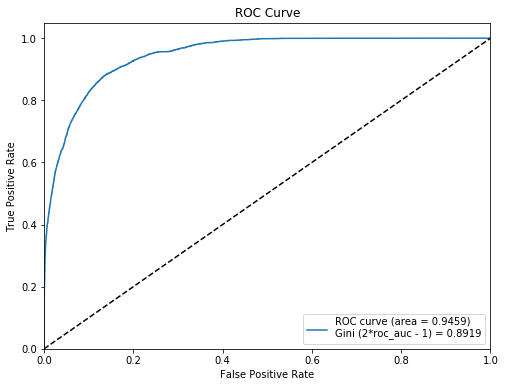

In [487]:
graficar_roc(y_train, pred_proba_train) #0.9459

#### Prueba de Variables v2 =======================================

In [353]:
# Segundo conjunto de variables
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)
#matriz_conf

        Pred_0  Pred_1
Real_0   25576    1501
Real_1    4623    3419


In [354]:
accuracy_train = mt.accuracy_score(y_train, pred_train)
print('Accuracy - Train:', accuracy_train) #0.8903442580939093

Accuracy - Train: 0.8256214584697742


In [355]:
print(mt.classification_report(y_train, pred_train, digits=3))

             precision    recall  f1-score   support

          0      0.847     0.945     0.893     27077
          1      0.695     0.425     0.528      8042

avg / total      0.812     0.826     0.809     35119



ROC AUC: 0.8166


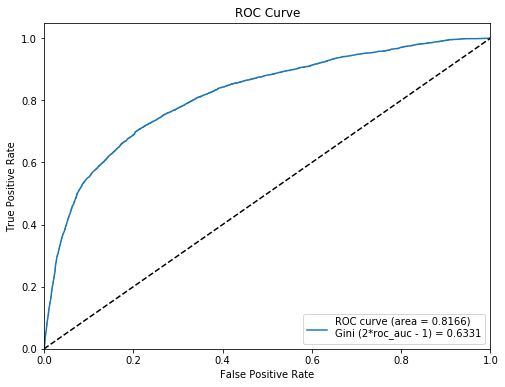

In [356]:
graficar_roc(y_train, pred_proba_train) #0.9459

#### Prueba de Variables v3 =======================================

In [147]:
# Segundo conjunto de variables
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)
#matriz_conf

        Pred_0  Pred_1
Real_0   25559    1518
Real_1    4462    3580


In [148]:
accuracy_train = mt.accuracy_score(y_train, pred_train)
print('Accuracy - Train:', accuracy_train) #0.8903442580939093

Accuracy - Train: 0.8297218030126142


In [149]:
print(mt.classification_report(y_train, pred_train, digits=3))

             precision    recall  f1-score   support

          0      0.851     0.944     0.895     27077
          1      0.702     0.445     0.545      8042

avg / total      0.817     0.830     0.815     35119



ROC AUC: 0.8140


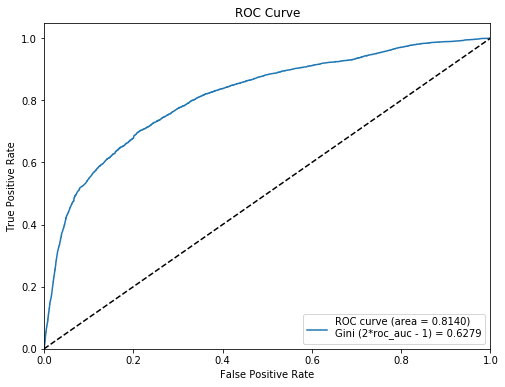

In [151]:
graficar_roc(y_train, pred_proba_train) #0.9459

### Test Grupo de variables v1

In [488]:
# Sobre el testing Data
print('Metricas del testing...')

Metricas del testing...


In [489]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
#print_mc(matriz_conf)
matriz_conf

array([[17097,   913],
       [ 1645,  3758]], dtype=int64)

In [490]:
accuracy_test = mt.accuracy_score(y_test, pred_test)
print('Accuracy - test:', accuracy_test) # Accuracy - test: 0.8910007260923418

Accuracy - test: 0.890744458206979


In [491]:
print(mt.classification_report(y_test, pred_test, digits=3))

             precision    recall  f1-score   support

          0      0.912     0.949     0.930     18010
          1      0.805     0.696     0.746      5403

avg / total      0.887     0.891     0.888     23413



ROC AUC: 0.9458


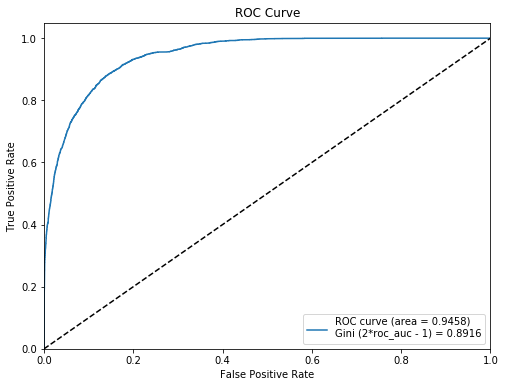

In [492]:
graficar_roc(y_test, pred_proba_test) #0.9457

### Test Grupo de variables v2

In [357]:
# Sobre el testing Data
print('Metricas del testing...')

Metricas del testing...


In [358]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)
#matriz_conf

        Pred_0  Pred_1
Real_0   17073     937
Real_1    3088    2315


In [359]:
accuracy_test = mt.accuracy_score(y_test, pred_test)
print('Accuracy - test:', accuracy_test) # Accuracy - test: 0.8910007260923418

Accuracy - test: 0.8280869602357664


In [360]:
print(mt.classification_report(y_test, pred_test, digits=3))

             precision    recall  f1-score   support

          0      0.847     0.948     0.895     18010
          1      0.712     0.428     0.535      5403

avg / total      0.816     0.828     0.812     23413



ROC AUC: 0.8181


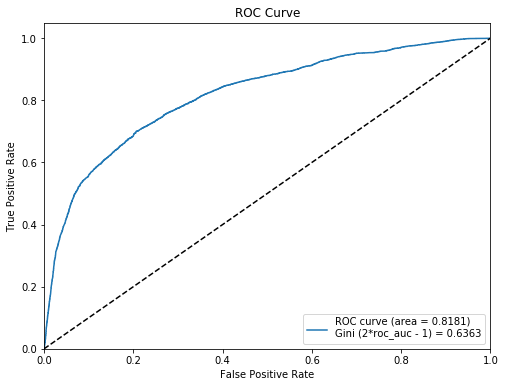

In [361]:
graficar_roc(y_test, pred_proba_test) #0.9457

### Test Grupo de variables v3

In [152]:
# Sobre el testing Data
print('Metricas del testing...')

Metricas del testing...


In [153]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)
#matriz_conf

        Pred_0  Pred_1
Real_0   17100     910
Real_1    3008    2395


In [154]:
accuracy_test = mt.accuracy_score(y_test, pred_test)
print('Accuracy - test:', accuracy_test) # Accuracy - test: 0.8910007260923418

Accuracy - test: 0.8326570708580703


In [155]:
print(mt.classification_report(y_test, pred_test, digits=3))

             precision    recall  f1-score   support

          0      0.850     0.949     0.897     18010
          1      0.725     0.443     0.550      5403

avg / total      0.821     0.833     0.817     23413



ROC AUC: 0.8153


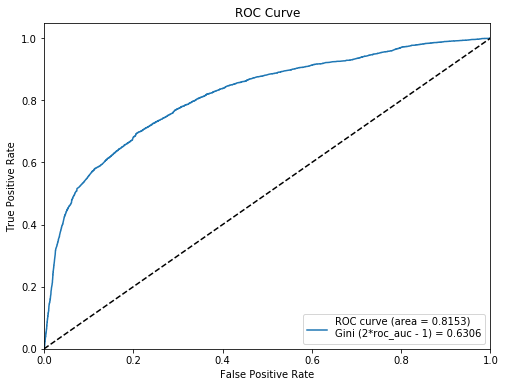

In [156]:
graficar_roc(y_test, pred_proba_test) #0.9457

### 4.2 DECISION TREE

### 4.2.1 Entrenamiento y Predicción

In [573]:
from sklearn.tree import DecisionTreeClassifier

In [574]:
# Crear objeto modelo (Instanciar)
model_tree = DecisionTreeClassifier(max_depth=6, random_state = 6)

In [575]:
# Entrenar (ajustar) el modelo:
model = model_tree.fit(X_train,y_train)

In [576]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

### 4.2.2 Evaluación del Modelo

In [577]:
from sklearn import metrics as mt

In [578]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [579]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
#print_mc(matriz_conf)
matriz_conf

array([[25468,  1609],
       [ 3974,  4068]], dtype=int64)

In [580]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.8395455451465019

Accuracy - Train: 0.8410262251203052


In [581]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.865     0.941     0.901     27077
          1      0.717     0.506     0.593      8042

avg / total      0.831     0.841     0.831     35119



ROC AUC: 0.8410


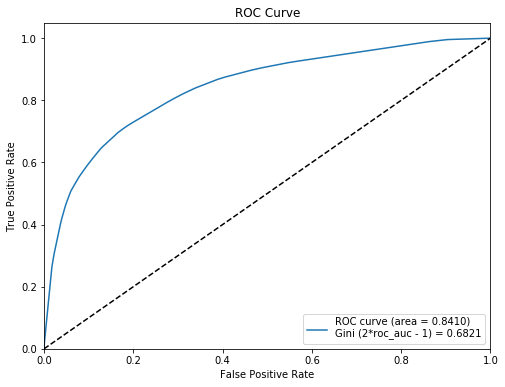

In [582]:
graficar_roc(y_train,pred_proba_train) # 0.9170

In [583]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [584]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
#print_mc(matriz_conf)
matriz_conf

array([[16975,  1035],
       [ 2708,  2695]], dtype=int64)

In [585]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8375

Accuracy - test: 0.8401315508478195


In [586]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.862     0.943     0.901     18010
          1      0.723     0.499     0.590      5403

avg / total      0.830     0.840     0.829     23413



ROC AUC: 0.8402


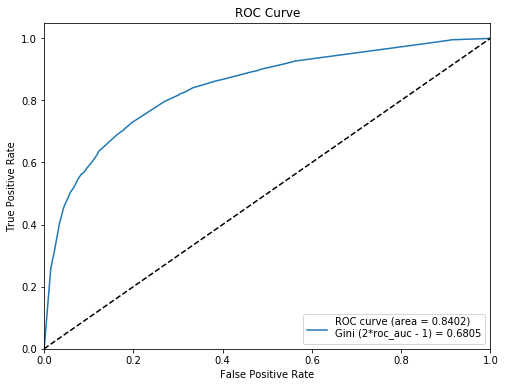

In [587]:
graficar_roc(y_test,pred_proba_test) # 0.9514

In [452]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [453]:
train_accuracy_list, train_auc_list = [], []
test_accuracy_list, test_auc_list = [], []
max_depth_range = list(range(1, 30))
for max_depth in max_depth_range:
    
    treeclf = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    treeclf.fit(X_train, y_train)
    
    y_train_pred = treeclf.predict(X_train)
    y_test_pred = treeclf.predict(X_test)
    
    y_train_pred_proba = treeclf.predict_proba(X_train)[:, 1]
    y_test_pred_proba = treeclf.predict_proba(X_test)[:, 1]
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred_proba)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred_proba)
    
    train_accuracy_list.append(accuracy_train)
    train_auc_list.append(auc_train)
    test_accuracy_list.append(accuracy_test)
    test_auc_list.append(auc_test)
    
    print("Train - max_depth: {}, accuracy: {}, auc: {}".format(max_depth, accuracy_train, auc_train))
    print("Test - max_depth: {}, accuracy: {}, auc: {} \n".format(max_depth, accuracy_test, auc_test))

Train - max_depth: 1, accuracy: 0.7804037700390102, auc: 0.7302269825301424
Test - max_depth: 1, accuracy: 0.7855892025797634, auc: 0.7328243568387932 

Train - max_depth: 2, accuracy: 0.8239699308066858, auc: 0.7921047041716955
Test - max_depth: 2, accuracy: 0.8277452697219494, auc: 0.7970609619781637 

Train - max_depth: 3, accuracy: 0.8279848515048834, auc: 0.8083755899579429
Test - max_depth: 3, accuracy: 0.8318028445735275, auc: 0.8147726092080994 

Train - max_depth: 4, accuracy: 0.8378370682536519, auc: 0.8205802307395351
Test - max_depth: 4, accuracy: 0.8404732413616367, auc: 0.8265202059891666 

Train - max_depth: 5, accuracy: 0.8382357128619835, auc: 0.8299634002221065
Test - max_depth: 5, accuracy: 0.8402169734762739, auc: 0.8349550648594982 

Train - max_depth: 6, accuracy: 0.8399157151399528, auc: 0.8378011001205153
Test - max_depth: 6, accuracy: 0.8409430658181353, auc: 0.8400502096281264 

Train - max_depth: 7, accuracy: 0.8417380904923261, auc: 0.8454943268488954
Test -

### 4.2.3 Variables Importantes

In [588]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

In [589]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,Category2,0.624048
1,Dias_Transcurridos,0.181661
2,Cant_Inscripcion,0.093305
3,Dias_Campamento,0.032282
4,Income2,0.018072
5,Category1,0.011363
6,Education_Score,0.009144
7,Sum_Var,0.007513
8,City_Type2,0.007072
9,Pc_Dias_Transcurridos,0.005579


In [565]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

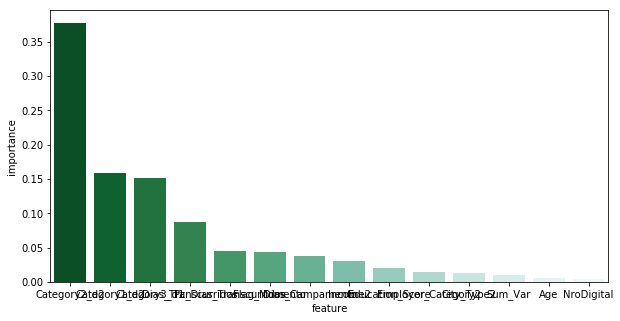

In [566]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')

## 5.1 RANDOM FOREST

### 5.1.1 Entrenamiento y Predicción

In [609]:
from sklearn.ensemble import RandomForestClassifier

In [610]:
# Crear objeto modelo (Instanciar)
model_rf = RandomForestClassifier(max_depth = 6, 
                                  n_estimators = 50, 
                                  random_state = 50 , 
                                  max_features = 4)

In [611]:
# Entrenar (ajustar) el modelo:
model = model_rf.fit(X_train,y_train)

In [612]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

### Buscando los mejores parámetros para el Random Forest

In [608]:
train_accuracy_list, train_auc_list = [], []
test_accuracy_list, test_auc_list = [], []
max_depth_range = list(range(1, 10))
for max_depth in max_depth_range:
    
    treeclf = RandomForestClassifier(max_depth= 6, # 6
                                  n_estimators= 50,# 50, 
                                  random_state= 50 , 
                                  max_features = 4)#5)
    treeclf.fit(X_train, y_train)
    
    y_train_pred = treeclf.predict(X_train)
    y_test_pred = treeclf.predict(X_test)
    
    y_train_pred_proba = treeclf.predict_proba(X_train)[:, 1]
    y_test_pred_proba = treeclf.predict_proba(X_test)[:, 1]
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred_proba)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred_proba)
    
    train_accuracy_list.append(accuracy_train)
    train_auc_list.append(auc_train)
    test_accuracy_list.append(accuracy_test)
    test_auc_list.append(auc_test)
    
    print("Train - max_depth: {}, accuracy: {}, auc: {}".format(max_depth, accuracy_train, auc_train))
    print("Test - max_depth: {}, accuracy: {}, auc: {} \n".format(max_depth, accuracy_test, auc_test))

Train - max_depth: 1, accuracy: 0.8153990717275549, auc: 0.8404637815849845
Test - max_depth: 1, accuracy: 0.8157861017383505, auc: 0.839276234448483 

Train - max_depth: 2, accuracy: 0.8358438452119935, auc: 0.8430705075085131
Test - max_depth: 2, accuracy: 0.8374407380515099, auc: 0.8416102504592888 

Train - max_depth: 3, accuracy: 0.8378655428685327, auc: 0.8453076109078592
Test - max_depth: 3, accuracy: 0.8393627471917311, auc: 0.8441213741558636 

Train - max_depth: 4, accuracy: 0.8390614766935277, auc: 0.8470147405480095
Test - max_depth: 4, accuracy: 0.8407722205612267, auc: 0.8462935176058954 

Train - max_depth: 5, accuracy: 0.8406845297417352, auc: 0.8491924005133259
Test - max_depth: 5, accuracy: 0.8412420450177251, auc: 0.8485517793341414 

Train - max_depth: 6, accuracy: 0.8413109712691136, auc: 0.8493235374864744
Test - max_depth: 6, accuracy: 0.8414556015888609, auc: 0.848773857614834 

Train - max_depth: 7, accuracy: 0.8406275805119736, auc: 0.8491313658285322
Test - m

### 5.1.2 Evaluación del Modelo

In [613]:
from sklearn import metrics as mt

In [614]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [615]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0   25637    1440
Real_1    4212    3830


In [616]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.845833333333

Accuracy - Train: 0.8390614766935277


In [617]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.859     0.947     0.901     27077
          1      0.727     0.476     0.575      8042

avg / total      0.829     0.839     0.826     35119



ROC AUC: 0.8470


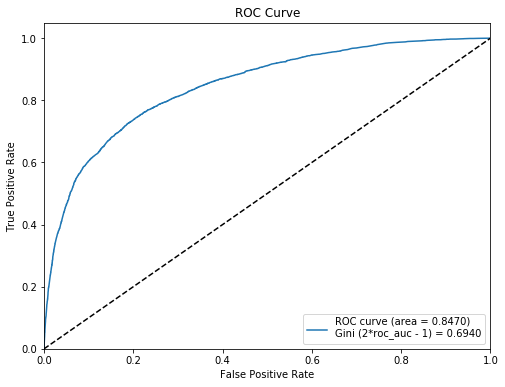

In [618]:
graficar_roc(y_train,pred_proba_train) # 0.9170

In [619]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [620]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0   17111     899
Real_1    2829    2574


In [621]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8375

Accuracy - test: 0.8407722205612267


In [622]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.858     0.950     0.902     18010
          1      0.741     0.476     0.580      5403

avg / total      0.831     0.841     0.828     23413



ROC AUC: 0.8463


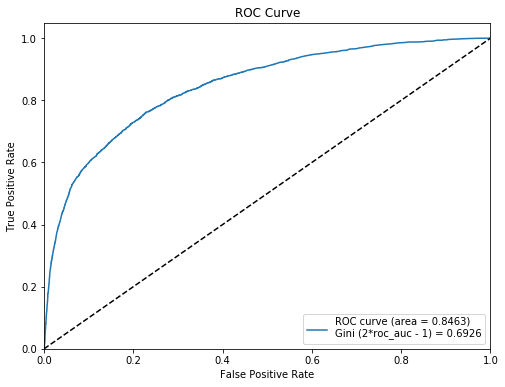

In [623]:
graficar_roc(y_test,pred_proba_test) # 0.9514

### 5.1.3 Variables Importantes

In [624]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

In [625]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,Category2,0.410007
1,Category1,0.234385
2,Dias_Transcurridos,0.091351
3,Cant_Inscripcion,0.050055
4,Flag_Momento,0.049216
5,Dias_Campamento,0.038387
6,Pc_Dias_Transcurridos,0.037854
7,Income2,0.024074
8,City_Type2,0.013529
9,Employer_Category2,0.013438


In [626]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

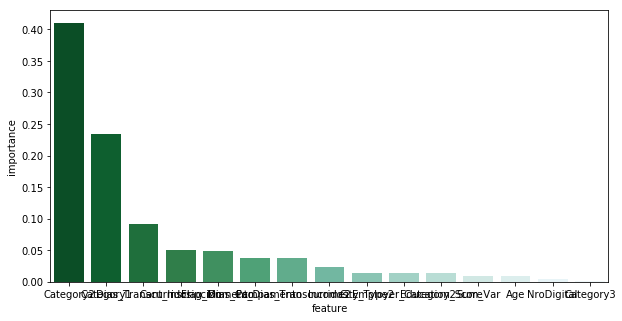

In [627]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')

## Data Test

In [676]:
TestFinal = Test6.copy()

In [677]:
X_test_real = TestFinal[features_to_model_v4]
X_test_real.describe()

,Category1,Category2,Category3,Education_Score,Age,City_Type2,Dias_Campamento,Dias_Transcurridos,Flag_Momento,Pc_Dias_Transcurridos,NroDigital,Sum_Var,Income2,Employer_Category2,Cant_Inscripcion
count,16746.000000,16746.000000,16746.0,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000
mean,2.163860,3.801923,2.0,-85.621599,45.254927,7.424221,353.346949,90.644811,0.685716,0.232714,0.134122,1.006688,-6.882061,12.993551,2.164577
std,0.728073,2.053218,0.0,46.862591,6.714672,2.890686,366.293140,141.505992,0.464244,0.255876,0.500627,10.307396,4.195891,2.847401,1.274891
min,1.000000,1.000000,2.0,-99.000000,31.000000,1.000000,2.000000,-78.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,1.000000
25%,2.000000,3.000000,2.0,-99.000000,44.000000,5.000000,4.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,14.000000,1.000000
50%,2.000000,3.000000,2.0,-99.000000,44.000000,9.000000,74.000000,28.000000,1.000000,0.178429,0.000000,0.000000,-9.000000,14.000000,2.000000
75%,3.000000,6.000000,2.0,-99.000000,44.000000,10.000000,751.000000,166.000000,1.000000,0.391892,0.000000,0.000000,-9.000000,14.000000,3.000000
max,3.000000,7.000000,2.0,96.000000,78.000000,10.000000,771.000000,500.000000,1.000000,1.000000,3.000000,447.000000,6.000000,15.000000,7.000000


In [678]:
# Generar las predicciones:
#pred_train = model_tree_fit.predict(X_train)
pred_test = model.predict(X_test_real)

# Generar las probabilidades
#pred_proba_train = model_tree_fit.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test_real)

In [679]:
pred_proba_train

array([[0.94896386, 0.05103614],
       [0.51439584, 0.48560416],
       [0.87345165, 0.12654835],
       ...,
       [0.72362288, 0.27637712],
       [0.62523764, 0.37476236],
       [0.35994418, 0.64005582]])

In [680]:
# Data de entrenamiento
pred_proba_test

array([[0.55537382, 0.44462618],
       [0.94566525, 0.05433475],
       [0.9168735 , 0.0831265 ],
       ...,
       [0.23641756, 0.76358244],
       [0.73618558, 0.26381442],
       [0.899847  , 0.100153  ]])

In [681]:
# Data de Teeest
ProbTest_Final1 = pd.DataFrame(pred_proba_test)


In [239]:
TestFinal.to_csv("D:/Machine Learning/TestFinal_MedCampv2.csv", sep = ',', index = False)

In [682]:
ProbTest_Final1.to_csv("D:/Machine Learning/Tf_MedCamp_GBM_Final.csv", sep = ',', index = False)

## 5.2 GRADIENT BOOSTING MACHINE

### 5.2.1 Entrenamiento y Predicción

In [652]:
from sklearn.ensemble import GradientBoostingClassifier

In [658]:
# Crear objeto modelo (Instanciar)
model_gbm = GradientBoostingClassifier(max_depth=4, n_estimators= 50, 
                                       random_state=50 , max_features = 4)

In [659]:
# Entrenar (ajustar) el modelo:
model = model_gbm.fit(X_train,y_train)

In [660]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

In [657]:
train_accuracy_list, train_auc_list = [], []
test_accuracy_list, test_auc_list = [], []
max_depth_range = list(range(1, 10))
for max_depth in max_depth_range:
    
    treeclf = GradientBoostingClassifier(max_depth= 4, # 6
                                  n_estimators= max_depth*10,# 50, 
                                  random_state= 50 , 
                                  max_features = 4)#5)
    treeclf.fit(X_train, y_train)
    
    y_train_pred = treeclf.predict(X_train)
    y_test_pred = treeclf.predict(X_test)
    
    y_train_pred_proba = treeclf.predict_proba(X_train)[:, 1]
    y_test_pred_proba = treeclf.predict_proba(X_test)[:, 1]
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred_proba)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred_proba)
    
    train_accuracy_list.append(accuracy_train)
    train_auc_list.append(auc_train)
    test_accuracy_list.append(accuracy_test)
    test_auc_list.append(auc_test)
    
    print("Train - max_depth: {}, accuracy: {}, auc: {}".format(max_depth, accuracy_train, auc_train))
    print("Test - max_depth: {}, accuracy: {}, auc: {} \n".format(max_depth, accuracy_test, auc_test))

Train - max_depth: 1, accuracy: 0.8122668640906632, auc: 0.8298530413559781
Test - max_depth: 1, accuracy: 0.8132661341989493, auc: 0.83260259713407 

Train - max_depth: 2, accuracy: 0.8351889290697343, auc: 0.837140894081968
Test - max_depth: 2, accuracy: 0.8375688719941913, auc: 0.8390331250154792 

Train - max_depth: 3, accuracy: 0.837808593638771, auc: 0.8434643524054388
Test - max_depth: 3, accuracy: 0.8395335924486397, auc: 0.8445876306405545 

Train - max_depth: 4, accuracy: 0.8406845297417352, auc: 0.8484358147351327
Test - max_depth: 4, accuracy: 0.8408576431896809, auc: 0.8488025140371251 

Train - max_depth: 5, accuracy: 0.8412255474244711, auc: 0.8529220167632505
Test - max_depth: 5, accuracy: 0.8414983129030881, auc: 0.8528190427860887 

Train - max_depth: 6, accuracy: 0.842079785870896, auc: 0.8552022905891722
Test - max_depth: 6, accuracy: 0.8417118694742237, auc: 0.8539949580728331 

Train - max_depth: 7, accuracy: 0.8427062273982744, auc: 0.8568899210929743
Test - max_

### 5.2.2 Evaluación del Modelo

In [661]:
from sklearn import metrics as mt

In [662]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [663]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0   25581    1496
Real_1    4080    3962


In [664]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.845833333333

Accuracy - Train: 0.8412255474244711


In [665]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.862     0.945     0.902     27077
          1      0.726     0.493     0.587      8042

avg / total      0.831     0.841     0.830     35119



ROC AUC: 0.8529


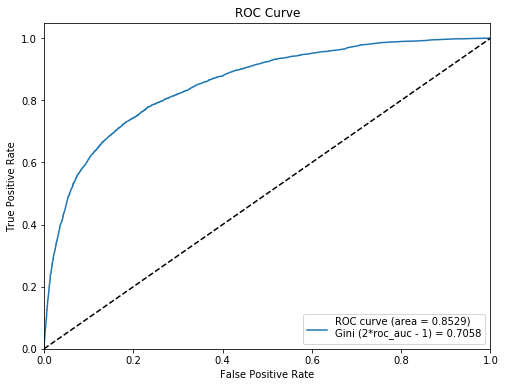

In [666]:
graficar_roc(y_train,pred_proba_train) # 0.9170

In [667]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [668]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0   17063     947
Real_1    2764    2639


In [669]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8375

Accuracy - test: 0.8414983129030881


In [670]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.861     0.947     0.902     18010
          1      0.736     0.488     0.587      5403

avg / total      0.832     0.841     0.829     23413



ROC AUC: 0.8528


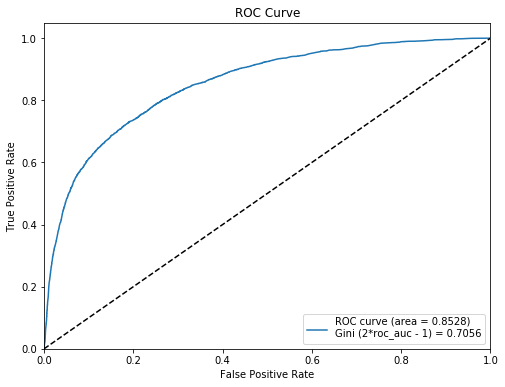

In [671]:
graficar_roc(y_test,pred_proba_test) # 0.9514

### 5.1.3 Variables Importantes

In [672]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

In [673]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,Category2,0.199760
1,Dias_Campamento,0.151075
2,Category1,0.145115
3,Cant_Inscripcion,0.106385
4,Dias_Transcurridos,0.104141
5,Pc_Dias_Transcurridos,0.067316
6,Age,0.043887
7,Sum_Var,0.036485
8,Flag_Momento,0.033657
9,Education_Score,0.032362


In [674]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

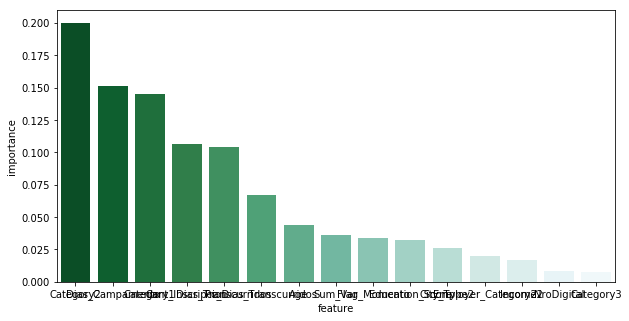

In [675]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')

# Stacking Ensembling

In [683]:
model_regl = LogisticRegression()
model_rf = RandomForestClassifier(max_depth=6, n_estimators= 50, random_state=50 , max_features = 4)
model_gbm = GradientBoostingClassifier(max_depth=4, n_estimators= 50, random_state=50 , max_features = 4)

In [684]:
model_regl = model_regl.fit(X_train,y_train)
model_rf = model_rf.fit(X_train,y_train)
model_gbm = model_gbm.fit(X_train,y_train)

In [685]:
# Probabilidades - Training
pred_proba_train_regl = pd.DataFrame(model_regl.predict_proba(X_train)[:,1],columns = ["pre_rlog"])
pred_proba_train_rf = pd.DataFrame(model_rf.predict_proba(X_train)[:,1],columns = ["pre_rf"])
pred_proba_train_gbm = pd.DataFrame(model_gbm.predict_proba(X_train)[:,1],columns = ["pre_rgbm"])

In [686]:
# Probabilidades - testing
pred_proba_test_regl = pd.DataFrame(model_regl.predict_proba(X_test)[:,1],columns = ["pre_rlog"])
pred_proba_test_rf = pd.DataFrame(model_rf.predict_proba(X_test)[:,1],columns = ["pre_rf"])
pred_proba_test_gbm = pd.DataFrame(model_gbm.predict_proba(X_test)[:,1],columns = ["pre_rgbm"])

In [687]:
roc_regl = mt.roc_auc_score(y_test,pred_proba_test_regl)
roc_rf = mt.roc_auc_score(y_test,pred_proba_test_rf)
roc_gbm = mt.roc_auc_score(y_test,pred_proba_test_gbm)

In [688]:
print("REG LOG: ",roc_regl)
print("RF:      ",roc_rf)
print("GBM:     ",roc_gbm)

REG LOG:  0.8181363963487904
RF:       0.8462935176058954
GBM:      0.8528190427860887


In [689]:
# Crear New DF Train:
df_train_2 = pd.concat([pred_proba_train_regl, 
                        pred_proba_train_rf, 
                        pred_proba_train_gbm], axis = 1)
df_train_2.head()

,pre_rlog,pre_rf,pre_rgbm
0,0.041628,0.074572,0.051036
1,0.546690,0.477173,0.485604
2,0.055713,0.132366,0.126548
3,0.112187,0.075935,0.078411
4,0.133271,0.179914,0.178098


In [690]:
# Crear New DF Test:
df_test_2 = pd.concat([pred_proba_test_regl, 
                        pred_proba_test_rf, 
                        pred_proba_test_gbm], axis = 1)
df_test_2.head()

,pre_rlog,pre_rf,pre_rgbm
0,0.117653,0.064232,0.058907
1,0.482531,0.781157,0.805480
2,0.268358,0.272327,0.301196
3,0.242161,0.567460,0.514132
4,0.075042,0.168774,0.204477


In [323]:
# Modelo NIVEL 2

In [691]:
from sklearn.neural_network import MLPClassifier

In [692]:
model_rn_stacking = MLPClassifier(hidden_layer_sizes=(100), max_iter=100,
                                 random_state = 20, activation = 'tanh')

In [693]:
model_rn_stacking = model_rn_stacking.fit(df_train_2,y_train)

In [694]:
prob_stack_train = model_rn_stacking.predict_proba(df_train_2)[:,1]
prob_stack_test = model_rn_stacking.predict_proba(df_test_2)[:,1]

In [695]:
roc_stack_train = mt.roc_auc_score(y_train,prob_stack_train)
roc_stack_test = mt.roc_auc_score(y_test,prob_stack_test)

In [696]:
print("ROC STACK - TRAIN:", roc_stack_train)
print("ROC STACK - TEST: ", roc_stack_test)

ROC STACK - TRAIN: 0.8528652874106109
ROC STACK - TEST:  0.8520572557064408


In [697]:
print("REG LOG: ",roc_regl)
print("RF:      ",roc_rf)
print("GBM:     ",roc_gbm)

REG LOG:  0.8181363963487904
RF:       0.8462935176058954
GBM:      0.8528190427860887


## Data Test

In [698]:
TestFinal = Test6.copy()

In [699]:
X_test_real = TestFinal[features_to_model_v4]
X_test_real.describe()

,Category1,Category2,Category3,Education_Score,Age,City_Type2,Dias_Campamento,Dias_Transcurridos,Flag_Momento,Pc_Dias_Transcurridos,NroDigital,Sum_Var,Income2,Employer_Category2,Cant_Inscripcion
count,16746.000000,16746.000000,16746.0,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000,16746.000000
mean,2.163860,3.801923,2.0,-85.621599,45.254927,7.424221,353.346949,90.644811,0.685716,0.232714,0.134122,1.006688,-6.882061,12.993551,2.164577
std,0.728073,2.053218,0.0,46.862591,6.714672,2.890686,366.293140,141.505992,0.464244,0.255876,0.500627,10.307396,4.195891,2.847401,1.274891
min,1.000000,1.000000,2.0,-99.000000,31.000000,1.000000,2.000000,-78.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,1.000000
25%,2.000000,3.000000,2.0,-99.000000,44.000000,5.000000,4.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,14.000000,1.000000
50%,2.000000,3.000000,2.0,-99.000000,44.000000,9.000000,74.000000,28.000000,1.000000,0.178429,0.000000,0.000000,-9.000000,14.000000,2.000000
75%,3.000000,6.000000,2.0,-99.000000,44.000000,10.000000,751.000000,166.000000,1.000000,0.391892,0.000000,0.000000,-9.000000,14.000000,3.000000
max,3.000000,7.000000,2.0,96.000000,78.000000,10.000000,771.000000,500.000000,1.000000,1.000000,3.000000,447.000000,6.000000,15.000000,7.000000


In [700]:
# Probabilidades - testing
pred_proba_test_regl = pd.DataFrame(model_regl.predict_proba(X_test_real)[:,1],columns = ["pre_rlog"])
pred_proba_test_rf = pd.DataFrame(model_rf.predict_proba(X_test_real)[:,1],columns = ["pre_rf"])
pred_proba_test_gbm = pd.DataFrame(model_gbm.predict_proba(X_test_real)[:,1],columns = ["pre_rgbm"])

In [701]:
# Crear New DF Test:
df_test_real_2 = pd.concat([pred_proba_test_regl, 
                        pred_proba_test_rf, 
                        pred_proba_test_gbm], axis = 1)
df_test_real_2.head()

,pre_rlog,pre_rf,pre_rgbm
0,0.190463,0.596408,0.444626
1,0.043144,0.061825,0.054335
2,0.044165,0.097365,0.083127
3,0.043179,0.095917,0.073179
4,0.040347,0.062826,0.054335


In [703]:
#prob_stack_train = model_rn_stacking.predict_proba(df_train_2)[:,1]
prob_stack_test = model_rn_stacking.predict_proba(df_test_real_2)[:,1]
prob_stack_test

array([0.63859338, 0.05125107, 0.07069747, ..., 0.77544677, 0.2730677 ,
       0.07338614])

In [704]:
# Data de Teeest
ProbTest_Final_Ens = pd.DataFrame(prob_stack_test)


In [705]:
ProbTest_Final_Ens.to_csv("D:/Machine Learning/Tf_MedCamp_Ens_Final.csv", sep = ',', index = False)

# Transformando Data Test

# 1. Carga de datos

In [456]:
import numpy as np

In [457]:
import pandas as pd
xls = pd.ExcelFile("ML_Agrupado.xlsx")

In [458]:
Test = xls.parse("Test") #Test

In [459]:
Formato1 = Test.loc[Test["Category1"]=="First"]
Formato2 = Test.loc[Test["Category1"]=="Second"]
Formato3 = Test.loc[Test["Category1"]=="Third"]

In [460]:
Test = xls.parse("Test") #Test

In [461]:
Test.head(2).T

,0,1
Patient_ID,498378,498378
Health_Camp_ID,6534,6537
Registration_Date,2007-02-06 00:00:00,2007-02-06 00:00:00
Var1,0,0
Var2,0,0
Var3,0,0
Var4,0,0
Var5,0,0
Category1,Second,First
Category2,A,F


## Revisión inicial

In [462]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16746 entries, 0 to 16745
Data columns (total 33 columns):
Patient_ID                   16746 non-null int64
Health_Camp_ID               16746 non-null int64
Registration_Date            16735 non-null datetime64[ns]
Var1                         16746 non-null int64
Var2                         16746 non-null int64
Var3                         16746 non-null int64
Var4                         16746 non-null int64
Var5                         16746 non-null int64
Category1                    16746 non-null object
Category2                    16746 non-null object
Category3                    16746 non-null int64
Camp_Start_Date              16746 non-null datetime64[ns]
Camp_End_Date                16746 non-null datetime64[ns]
Donation_F1                  0 non-null float64
Health_Score_F1              0 non-null float64
Health_Score_F2              0 non-null float64
Health_Score_T               0 non-null float64
Number_of_stall_visi

In [463]:
var_num = ['Var1',
'Var2',
'Var3',
'Var4',
'Var5',
#'Donation_F1',
#'Health_Score_F1',
#'Health_Score_F2',
#'Health_Score_T',
#'Number_of_stall_visited',
#'Last_Stall_Visited_Number',
#'Income',
'Education_Score',
'Age']

In [464]:
vars_obj = list(Test.select_dtypes(include = ['object']).columns.values)
#vars_obj.remove('ID')
vars_obj.append("Category3") 
vars_obj.append("Online_Follower") 
vars_obj.append("LinkedIn_Shared") 
vars_obj.append("Twitter_Shared") 
vars_obj.append("Facebook_Shared") 
vars_obj.append("Income") 
#vars_obj.append("Education_Score") 
print(vars_obj)

['Category1', 'Category2', 'City_Type', 'Employer_Category', 'Category3', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared', 'Facebook_Shared', 'Income']


In [465]:
for elements in vars_obj:
    print( str(elements) + " ----> " +
        str(Test[elements].unique()))

Category1 ----> ['Second' 'First' 'Third']
Category2 ----> ['A' 'F' 'G' 'C' 'E']
City_Type ----> [nan 'H' 'A' 'C' 'B' 'E' 'D' 'F' 'I' 'G']
Employer_Category ----> [nan 'Health' 'Technology' 'Consulting' 'Others' 'Telecom' 'Retail'
 'Manufacturing' 'Education' 'Broadcasting' 'Software Industry' 'BFSI'
 'Real Estate' 'Food' 'Transport']
Category3 ----> [2]
Online_Follower ----> [0 1]
LinkedIn_Shared ----> [0 1]
Twitter_Shared ----> [0 1]
Facebook_Shared ----> [0 1]
Income ----> [nan  2.  0.  1.  3.  4.  5.  6.]


In [466]:
for elements in vars_obj:
    print("****************************************************************");
    Cuentas=pd.DataFrame(Test[elements].value_counts(dropna=False))
    Porc_Vert=pd.DataFrame(Test[elements].value_counts(normalize=True,dropna=False))
    Cant_Target=pd.DataFrame(Test.groupby(by=[elements], as_index=True)['Flag_Total'].sum())
    Porc_Target=pd.DataFrame(Test.groupby(by=[elements], as_index=True)['Flag_Total'].mean())
    print(pd.concat([Cuentas,Cant_Target,Porc_Vert,Porc_Target],axis=1))
    

****************************************************************
        Category1  Flag_Total  Category1  Flag_Total
First        6035           0   0.360385           0
Second       7420           0   0.443091           0
Third        3291           0   0.196525           0
****************************************************************
   Category2  Flag_Total  Category2  Flag_Total
A       7420           0   0.443091           0
C         90           0   0.005374           0
E       2086           0   0.124567           0
F       3859           0   0.230443           0
G       3291           0   0.196525           0
****************************************************************
     City_Type  Flag_Total  City_Type  Flag_Total
NaN       6781         NaN   0.404933         NaN
B         1818         0.0   0.108563         0.0
H         1673         0.0   0.099904         0.0
D         1195         0.0   0.071360         0.0
A         1061         0.0   0.063358         0.0
E    

In [467]:
for elements in vars_obj:
    print("****************************************************************");
    Cuentas=pd.DataFrame(Formato1[elements].value_counts(dropna=False))
    Porc_Vert=pd.DataFrame(Formato1[elements].value_counts(normalize=True,dropna=False))
    Porc_Target=pd.DataFrame(Formato1.groupby(by=[elements], as_index=True)['Flag_Total'].mean())
    print(pd.concat([Cuentas,Porc_Vert,Porc_Target],axis=1))
    

****************************************************************
           Category1  Category1  Flag_Total
Category1                                  
First           6035        1.0           0
****************************************************************
   Category2  Category2  Flag_Total
C         90   0.014913           0
E       2086   0.345650           0
F       3859   0.639437           0
****************************************************************
     City_Type  City_Type  Flag_Total
NaN       2527   0.418724         NaN
B          652   0.108036         0.0
H          533   0.088318         0.0
D          420   0.069594         0.0
A          396   0.065617         0.0
C          347   0.057498         0.0
E          341   0.056504         0.0
G          323   0.053521         0.0
I          279   0.046230         0.0
F          217   0.035957         0.0
****************************************************************
                   Employer_Category  Employer

In [468]:
for elements in vars_obj:
    print("****************************************************************");
    Cuentas=pd.DataFrame(Formato2[elements].value_counts(dropna=False))
    Porc_Vert=pd.DataFrame(Formato2[elements].value_counts(normalize=True,dropna=False))
    Porc_Target=pd.DataFrame(Formato2.groupby(by=[elements], as_index=True)['Flag_Total'].mean())
    print(pd.concat([Cuentas,Porc_Vert,Porc_Target],axis=1))

****************************************************************
           Category1  Category1  Flag_Total
Category1                                  
Second          7420        1.0           0
****************************************************************
           Category2  Category2  Flag_Total
Category2                                  
A               7420        1.0           0
****************************************************************
     City_Type  City_Type  Flag_Total
NaN       3031   0.408491         NaN
H          808   0.108895         0.0
B          768   0.103504         0.0
D          546   0.073585         0.0
A          449   0.060512         0.0
G          421   0.056739         0.0
C          412   0.055526         0.0
E          402   0.054178         0.0
I          302   0.040701         0.0
F          281   0.037871         0.0
****************************************************************
                   Employer_Category  Employer_Category  F

In [469]:
for elements in vars_obj:
    print("****************************************************************");
    Cuentas=pd.DataFrame(Formato3[elements].value_counts(dropna=False))
    Porc_Vert=pd.DataFrame(Formato3[elements].value_counts(normalize=True,dropna=False))
    Porc_Target=pd.DataFrame(Formato3.groupby(by=[elements], as_index=True)['Flag_Total'].mean())
    print(pd.concat([Cuentas,Porc_Vert,Porc_Target],axis=1))

****************************************************************
           Category1  Category1  Flag_Total
Category1                                  
Third           3291        1.0           0
****************************************************************
           Category2  Category2  Flag_Total
Category2                                  
G               3291        1.0           0
****************************************************************
     City_Type  City_Type  Flag_Total
NaN       1223   0.371620         NaN
B          398   0.120936         0.0
H          332   0.100881         0.0
D          229   0.069584         0.0
E          227   0.068976         0.0
A          216   0.065634         0.0
C          192   0.058341         0.0
G          186   0.056518         0.0
I          159   0.048314         0.0
F          129   0.039198         0.0
****************************************************************
                   Employer_Category  Employer_Category  F

In [470]:
Test1 = Test.copy()

In [471]:
#Test1["Dias_Transcurridos"].head()
Test1["Registration_Date"].fillna(Test1["Camp_Start_Date"], inplace = True)

In [472]:
Test1["Dias_Campamento"] = Test1["Camp_End_Date"] - Test1["Camp_Start_Date"] 

In [473]:
Test1["Dias_Transcurridos"] = Test1["Registration_Date"] - Test1["Camp_Start_Date"] 

In [474]:
Test1.isnull().sum()/58532 

Patient_ID                   0.000000
Health_Camp_ID               0.000000
Registration_Date            0.000000
Var1                         0.000000
Var2                         0.000000
Var3                         0.000000
Var4                         0.000000
Var5                         0.000000
Category1                    0.000000
Category2                    0.000000
Category3                    0.000000
Camp_Start_Date              0.000000
Camp_End_Date                0.000000
Donation_F1                  0.286100
Health_Score_F1              0.286100
Health_Score_F2              0.286100
Health_Score_T               0.286100
Number_of_stall_visited      0.286100
Last_Stall_Visited_Number    0.286100
Flag_Form1                   0.000000
Flag_Form2                   0.000000
Flag_Form3                   0.000000
Flag_Total                   0.000000
Online_Follower              0.000000
LinkedIn_Shared              0.000000
Twitter_Shared               0.000000
Facebook_Sha

In [475]:
Test1["Dias_Transcurridos"] = (Test1["Dias_Transcurridos"]/np.timedelta64(1,'D')).astype(int)
Test1["Dias_Campamento"] = (Test1["Dias_Campamento"]/np.timedelta64(1,'D')).astype(int)

In [476]:
def Momento(Valor):
    if Valor>=0 :
        return(1)
    else:
        return(0)

In [477]:
Test1["Flag_Momento"]=Test1["Dias_Transcurridos"].apply(lambda x:Momento(x))


In [478]:
Test1["Pc_Dias_Transcurridos"]= Test1["Dias_Transcurridos"]/Test1["Dias_Campamento"] 

In [479]:
Test1.loc[Test1["Flag_Momento"]==0,["Pc_Dias_Transcurridos"]] = 0

In [480]:
a = Test1.groupby("Patient_ID")["Flag_Total"].sum()
b = Test1.groupby("Patient_ID")["Flag_Total"].count()


In [481]:
# Pc_Inscripcion = np.array(a)/np.array(b)
Pc_Inscripcion = pd.DataFrame(a/b)
Cant_Inscripcion = pd.DataFrame(b)

#Pc_Inscripcion.columns=['Patient_ID','Pc_Inscripcion']
Pc_Inscripcion = Pc_Inscripcion.reset_index()
Cant_Inscripcion = Cant_Inscripcion.reset_index()

In [482]:
Pc_Inscripcion

,Patient_ID,Flag_Total
0,485682,0.0
1,485690,0.0
2,485699,0.0
3,485702,0.0
4,485705,0.0
5,485706,0.0
6,485713,0.0
7,485716,0.0
8,485720,0.0
9,485724,0.0


In [483]:
Cant_Inscripcion

,Patient_ID,Flag_Total
0,485682,1
1,485690,2
2,485699,1
3,485702,1
4,485705,1
5,485706,1
6,485713,1
7,485716,1
8,485720,3
9,485724,1


In [484]:
Pc_Inscripcion = Pc_Inscripcion.rename(columns={"Patient_ID":"Patient_ID", "Flag_Total":"Pc_Inscripcion"})
Cant_Inscripcion = Cant_Inscripcion.rename(columns={"Patient_ID":"Patient_ID", "Flag_Total":"Cant_Inscripcion"})

In [485]:
Test2 = pd.merge(Test1,Pc_Inscripcion, how =  "left", on = "Patient_ID")
Test2 = pd.merge(Test2,Cant_Inscripcion, how =  "left", on = "Patient_ID")

In [486]:
Test2.head().T

,0,1,2,3,4
Patient_ID,498378,498378,513141,519347,511385
Health_Camp_ID,6534,6537,6537,6537,6537
Registration_Date,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,Second,First,First,First,First
Category2,A,F,F,F,F


In [487]:
Test2["NroDigital"] = Test2["LinkedIn_Shared"]+Test2["Twitter_Shared"]+Test2["Facebook_Shared"]

In [488]:
Test2.head().T

,0,1,2,3,4
Patient_ID,498378,498378,513141,519347,511385
Health_Camp_ID,6534,6537,6537,6537,6537
Registration_Date,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,Second,First,First,First,First
Category2,A,F,F,F,F


# 2. Preprocesamiento de Datos

### 2.1 Procesamiento de Nulos

In [489]:
Test3 = Test2.copy()

In [490]:
Test3.head().T

,0,1,2,3,4
Patient_ID,498378,498378,513141,519347,511385
Health_Camp_ID,6534,6537,6537,6537,6537
Registration_Date,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,Second,First,First,First,First
Category2,A,F,F,F,F


In [491]:
vars_null = pd.DataFrame(Test3[vars_obj].isnull().sum())

In [492]:
Test3.shape

(16746, 40)

In [493]:
vars_null[vars_null[0] != 0]

,0
City_Type,6781
Employer_Category,14616
Income,13267


In [494]:
Formato1_Test = Formato1.copy()
Formato2_Test = Formato2.copy()
Formato3_Test = Formato3.copy()

In [495]:
Test3['City_Type'].fillna('Z', inplace = True)
Test3['Employer_Category'].fillna('No hay informacion', inplace = True)
Test3['Income'].fillna('No hay informacion', inplace = True)
Formato1_Test['Income'].fillna('No hay informacion', inplace = True)
Formato2_Test['Income'].fillna('No hay informacion', inplace = True)
Formato3_Test['Income'].fillna('No hay informacion', inplace = True)

In [496]:
vars_null = pd.DataFrame(Test3[vars_obj].isnull().sum())
vars_null[vars_null[0] != 0]

,0


### Variables numéricas

In [497]:
vars_null = pd.DataFrame(Test3[var_num].isnull().sum())
vars_null[vars_null[0] != 0]

,0
Education_Score,15481
Age,12654


In [498]:
Test3.groupby("Category1")["Age"].median()

Category1
First     44.0
Second    44.0
Third     44.0
Name: Age, dtype: float64

In [499]:
Test3['Age'].fillna(44, inplace = True)
Test3['Education_Score'].fillna(-99, inplace = True)

In [500]:
vars_null = pd.DataFrame(Test3[var_num].isnull().sum())
vars_null[vars_null[0] != 0]

,0


### 2.2 Transformando variables

In [501]:
Test3['Sum_Var'] = Test3['Var1'] + Test3['Var2'] + Test3['Var3'] + Test3['Var4'] + Test3['Var5']

In [502]:
Test3['Log_Var'] = np.log(Test3['Var1'] + Test3['Var2'] + Test3['Var3'] + Test3['Var4'] + Test3['Var5'])

D:\Machine Learning\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [503]:
Test4 = Test3.copy() 

In [504]:
Test4["Category1"].unique() # DICCIONARIO CATEGORY1

array(['Second', 'First', 'Third'], dtype=object)

In [505]:
# Imputacipon por orden de Ratio de conversión
dicc_Category = {'First' : 3,  
             'Second' : 2,
             'Third' : 1}

In [506]:
# Imputación por ratio de conversión
dicc_Category_2 = {'First' : 0.125202,  
             'Second' : 0.471666,
             'Third' : 0.619539}

In [507]:
Test4['Category1_d2'] = Test4['Category1'].map(dicc_Category_2)
Test4['Category1'] = Test4['Category1'].map(dicc_Category)

In [508]:
# dummy de CATEGORY_1
df_categ_dummies = pd.get_dummies(Test4["Category1"], prefix = 'Category1', drop_first = True) 

In [509]:
#del Test4["Category1"]
Test4 = pd.concat([Test4,df_categ_dummies], axis = 1)
Test4.head().T

,0,1,2,3,4
Patient_ID,498378,498378,513141,519347,511385
Health_Camp_ID,6534,6537,6537,6537,6537
Registration_Date,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,2,3,3,3,3
Category2,A,F,F,F,F


In [510]:
# Categoría 2
Test4["Category2"].unique()

array(['A', 'F', 'G', 'C', 'E'], dtype=object)

In [511]:
Test4.groupby("Category2")["Flag_Total"].mean()

Category2
A    0
C    0
E    0
F    0
G    0
Name: Flag_Total, dtype: int64

In [512]:
Formato1.groupby("Category2")["Flag_Total"].mean()

Category2
C    0
E    0
F    0
Name: Flag_Total, dtype: int64

In [513]:
Formato2.groupby("Category2")["Flag_Total"].mean()

Category2
A    0
Name: Flag_Total, dtype: int64

In [514]:
Formato3.groupby("Category2")["Flag_Total"].mean()

Category2
G    0
Name: Flag_Total, dtype: int64

In [515]:
# Ordenando por ratio de conversión
dicc1_cat2 = {'A' : 3, 
             'B' : 5,
             'C' : 4,
             'D' : 2,
             'E' : 7,
             'F' : 6,
             'G' : 1}

In [516]:
# Imputando ratio de conversión
dicc2_cat2 = {'A' : 0.349566, 
             'B' : 0.159522,
             'C' : 0.349537,
             'D' : 0.577530,
             'E' : 0.104751,
             'F' : 0.121148,
             'G' : 0.619539}

In [517]:
Test4['Category2_d2'] = Test4['Category2'].map(dicc2_cat2)
Test4['Category2'] = Test4['Category2'].map(dicc1_cat2)

In [518]:
# Categoría 3
Test4["Category3"].unique()

array([2], dtype=int64)

In [519]:
Test4.groupby("Category3")["Flag_Total"].mean()

Category3
2    0
Name: Flag_Total, dtype: int64

In [520]:
Formato1.groupby("Category3")["Flag_Total"].mean()

Category3
2    0
Name: Flag_Total, dtype: int64

In [521]:
Formato2.groupby("Category3")["Flag_Total"].mean()

Category3
2    0
Name: Flag_Total, dtype: int64

In [522]:
Formato3.groupby("Category3")["Flag_Total"].mean()

Category3
2    0
Name: Flag_Total, dtype: int64

In [523]:
reg_f1 = Test4["Category1"] == 3
reg_f2 = Test4["Category1"] == 2
reg_f3 = Test4["Category1"] == 1
reg_f1

0        False
1         True
2         True
3         True
4         True
5         True
6         True
7        False
8        False
9         True
10        True
11        True
12        True
13       False
14       False
15       False
16        True
17       False
18        True
19       False
20        True
21        True
22       False
23       False
24        True
25       False
26        True
27       False
28       False
29        True
         ...  
16716    False
16717     True
16718     True
16719    False
16720     True
16721    False
16722     True
16723    False
16724     True
16725    False
16726    False
16727    False
16728     True
16729     True
16730    False
16731    False
16732    False
16733     True
16734    False
16735    False
16736     True
16737    False
16738    False
16739     True
16740    False
16741     True
16742    False
16743    False
16744    False
16745     True
Name: Category1, Length: 16746, dtype: bool

In [524]:
Test4["Category3_d1"] = Test4["Category3"]
Test4.loc[(Test4["Category3"] == 1) & reg_f1, "Category3_d1"] = 0.255528
Test4.loc[(Test4["Category3"] == 2) & reg_f1, "Category3_d1"] = 0.123982
Test4.loc[(Test4["Category3"] == 2) & reg_f2, "Category3_d1"] = 0.471666
Test4.loc[(Test4["Category3"] == 2) & reg_f3, "Category3_d1"] = 0.619539
Test4.info().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16746 entries, 0 to 16745
Data columns (total 47 columns):
Patient_ID                   16746 non-null int64
Health_Camp_ID               16746 non-null int64
Registration_Date            16746 non-null datetime64[ns]
Var1                         16746 non-null int64
Var2                         16746 non-null int64
Var3                         16746 non-null int64
Var4                         16746 non-null int64
Var5                         16746 non-null int64
Category1                    16746 non-null int64
Category2                    16746 non-null int64
Category3                    16746 non-null int64
Camp_Start_Date              16746 non-null datetime64[ns]
Camp_End_Date                16746 non-null datetime64[ns]
Donation_F1                  0 non-null float64
Health_Score_F1              0 non-null float64
Health_Score_F2              0 non-null float64
Health_Score_T               0 non-null float64
Number_of_stall_visite

AttributeError: 'NoneType' object has no attribute 'T'

In [525]:
Test5 = Test4.copy()

In [526]:
Test5.head().T

,0,1,2,3,4
Patient_ID,498378,498378,513141,519347,511385
Health_Camp_ID,6534,6537,6537,6537,6537
Registration_Date,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,2,3,3,3,3
Category2,3,6,6,6,6


In [527]:
# Income
Test5["Income"].unique()

array(['No hay informacion', 2.0, 0.0, 1.0, 3.0, 4.0, 5.0, 6.0],
      dtype=object)

In [528]:
Test5.groupby("Income")["Flag_Total"].mean()

Income
0.0                   0
1.0                   0
2.0                   0
3.0                   0
4.0                   0
5.0                   0
6.0                   0
No hay informacion    0
Name: Flag_Total, dtype: int64

In [529]:
Formato1_Test.groupby("Income")["Flag_Total"].mean()

Income
0.0                   0
1.0                   0
2.0                   0
3.0                   0
4.0                   0
5.0                   0
6.0                   0
No hay informacion    0
Name: Flag_Total, dtype: int64

In [530]:
Formato2_Test.groupby("Income")["Flag_Total"].mean()

Income
0.0                   0
1.0                   0
2.0                   0
3.0                   0
4.0                   0
5.0                   0
6.0                   0
No hay informacion    0
Name: Flag_Total, dtype: int64

In [531]:
Formato3_Test.groupby("Income")["Flag_Total"].mean()

Income
0.0                   0
1.0                   0
2.0                   0
3.0                   0
4.0                   0
5.0                   0
6.0                   0
No hay informacion    0
Name: Flag_Total, dtype: int64

In [532]:
Formato1_Test.groupby("Income")["Flag_Total"].sum()

Income
0.0                   0
1.0                   0
2.0                   0
3.0                   0
4.0                   0
5.0                   0
6.0                   0
No hay informacion    0
Name: Flag_Total, dtype: int64

In [533]:
Formato2_Test.groupby("Income")["Flag_Total"].sum()

Income
0.0                   0
1.0                   0
2.0                   0
3.0                   0
4.0                   0
5.0                   0
6.0                   0
No hay informacion    0
Name: Flag_Total, dtype: int64

In [534]:
Formato3_Test.groupby("Income")["Flag_Total"].sum()

Income
0.0                   0
1.0                   0
2.0                   0
3.0                   0
4.0                   0
5.0                   0
6.0                   0
No hay informacion    0
Name: Flag_Total, dtype: int64

In [535]:
# Imputando orden de ratio de conversión
dicc1_income = {'No hay informacion' : -9, 
             0 : 0,
             1 : 1,
             2 : 2,
             3 : 3,
             4 : 6,
             5 : 5,
             6 : 4}

In [536]:
# ...

In [537]:
#Test4['Category2_d2'] = Test4['Category2'].map(dicc2_cat2)
Test5['Income2'] = Test5['Income'].map(dicc1_income)

In [538]:
# Income
Test5["Income2"].unique()

array([-9,  2,  0,  1,  3,  6,  5,  4], dtype=int64)

In [539]:
# Income
Test5["Income"].unique()

array(['No hay informacion', 2.0, 0.0, 1.0, 3.0, 4.0, 5.0, 6.0],
      dtype=object)

In [540]:
# Employer_Category

In [541]:
# Employer_Category
Test5["Employer_Category"].unique()

array(['No hay informacion', 'Health', 'Technology', 'Consulting',
       'Others', 'Telecom', 'Retail', 'Manufacturing', 'Education',
       'Broadcasting', 'Software Industry', 'BFSI', 'Real Estate', 'Food',
       'Transport'], dtype=object)

In [542]:
Test5.groupby("Employer_Category")["Flag_Total"].mean()

Employer_Category
BFSI                  0
Broadcasting          0
Consulting            0
Education             0
Food                  0
Health                0
Manufacturing         0
No hay informacion    0
Others                0
Real Estate           0
Retail                0
Software Industry     0
Technology            0
Telecom               0
Transport             0
Name: Flag_Total, dtype: int64

In [543]:
df = pd.DataFrame(Test5.groupby("Employer_Category")["Flag_Total"].mean())#, index=['Employer_Category', 'Total'])
df

,Flag_Total
Employer_Category,
BFSI,0
Broadcasting,0
Consulting,0
Education,0
Food,0
Health,0
Manufacturing,0
No hay informacion,0
Others,0


In [544]:
df = df.reset_index()

In [545]:
print(df.sort_values(by='Flag_Total', ascending=False))

     Employer_Category  Flag_Total
0                 BFSI           0
1         Broadcasting           0
2           Consulting           0
3            Education           0
4                 Food           0
5               Health           0
6        Manufacturing           0
7   No hay informacion           0
8               Others           0
9          Real Estate           0
10              Retail           0
11   Software Industry           0
12          Technology           0
13             Telecom           0
14           Transport           0


In [546]:
# Imputando orden de ratio de conversión
dicc1_Employer_Category = {'Education': 1,
                'Real Estate': 2,
                'Others': 3,
                'Transport': 4,
                'BFSI': 5,
                'Technology': 6,
                'Software Industry': 7,
                'Consulting': 8,
                'Retail': 9,
                'Telecom': 10,
                'Health': 11,
                'Manufacturing': 12,             
                'Food': 13,
                'No hay informacion': 14,
                'Broadcasting': 15}

In [547]:
#Test4['Category2_d2'] = Test4['Category2'].map(dicc2_cat2)
Test5['Employer_Category2'] = Test5['Employer_Category'].map(dicc1_Employer_Category)

In [548]:
Test5.head().T

,0,1,2,3,4
Patient_ID,498378,498378,513141,519347,511385
Health_Camp_ID,6534,6537,6537,6537,6537
Registration_Date,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,2,3,3,3,3
Category2,3,6,6,6,6


In [549]:
# City_Type
Test5["City_Type"].unique()

array(['Z', 'H', 'A', 'C', 'B', 'E', 'D', 'F', 'I', 'G'], dtype=object)

In [550]:
Test5.groupby("City_Type")["Flag_Total"].mean()

City_Type
A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
Z    0
Name: Flag_Total, dtype: int64

In [551]:
df = pd.DataFrame(Test5.groupby("City_Type")["Flag_Total"].mean())
df = df.reset_index()
print(df.sort_values(by='Flag_Total', ascending=False))

  City_Type  Flag_Total
0         A           0
1         B           0
2         C           0
3         D           0
4         E           0
5         F           0
6         G           0
7         H           0
8         I           0
9         Z           0


In [552]:
# Imputando orden de ratio de conversión
dicc1_City_Type = {'A': 7,
                'B': 9,
                'C': 2,
                'D': 8,
                'E': 5,
                'F': 1,
                'G': 3,
                'H': 6,
                'I': 4,
                'Z': 10}

In [553]:
#Test4['Category2_d2'] = Test4['Category2'].map(dicc2_cat2)
Test5['City_Type2'] = Test5['City_Type'].map(dicc1_City_Type)

In [554]:
Test6 = Test5.copy()

In [555]:
def SVariables(valor):
    if valor==0 :
        return('R0')
    elif valor <= 20 :
        return('R20')
    elif valor <= 40 :
        return('R40')
    elif valor <= 60 :
        return('R60')
    elif valor <= 80 :
        return('R80')
    elif valor <= 100 :
        return('R100')
    elif valor <= 150 :
        return('R150')
    elif valor <= 200 :
        return('R200')
    elif valor <= 250 :
        return('R250')
    elif valor <= 300 :
        return('R300')
    else:
        return('R_MAS')
SVariables(500)

'R_MAS'

In [556]:
Test6["Rango_Var"]=Test6["Sum_Var"].apply(lambda x:SVariables(x))

In [557]:
df = pd.DataFrame(Test6.groupby("Rango_Var")["Flag_Total"].mean())
df = df.reset_index()
print(df.sort_values(by='Flag_Total', ascending=False))

  Rango_Var  Flag_Total
0        R0           0
1      R150           0
2       R20           0
3      R200           0
4      R250           0
5      R300           0
6       R40           0
7       R60           0
8       R80           0
9     R_MAS           0


In [558]:
# Imputando orden de ratio de conversión
dicc1_sVariables = {'R_MAS': 1,
                'R60': 2,
                'R250': 3,
                'R80': 4,
                'R200': 5,
                'R300': 6,
                'R150': 7,
                'R40': 8,
                'R20': 9,
                'R0': 10,
                'R100': 11}

In [559]:
Test6['Rango_Var'] = Test6['Rango_Var'].map(dicc1_sVariables)

In [560]:
Test6.head().T

,0,1,2,3,4
Patient_ID,498378,498378,513141,519347,511385
Health_Camp_ID,6534,6537,6537,6537,6537
Registration_Date,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00,2007-02-06 00:00:00
Var1,0,0,0,0,0
Var2,0,0,0,0,0
Var3,0,0,0,0,0
Var4,0,0,0,0,0
Var5,0,0,0,0,0
Category1,2,3,3,3,3
Category2,3,6,6,6,6


In [ ]:
#ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff